# Advanced Data Analytics Spring 2024
## Riccardo Croci
### Sources used: 
1. Chat GPT 
2. Copilot 
3. https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
4. https://www.kaggle.com/code/ryannolan1/kaggle-housing-youtube-video
5. https://github.com/krishnaik06/Kaggle-Competitions
6. https://www.kaggle.com/code/gcdatkin/top-10-house-price-regression-competition-nb

In [ ]:
!pip install pycaret

In [2]:
import numpy as np
import pandas as pd

Load the data set


In [3]:
train = pd.read_csv('/Users/riccardo/Desktop/house-prices-advanced-regression-techniques/video/train.csv')
test = pd.read_csv('/Users/riccardo/Desktop/house-prices-advanced-regression-techniques/video/test.csv')

### Data Visualization 

Box plots for quantitative variables 

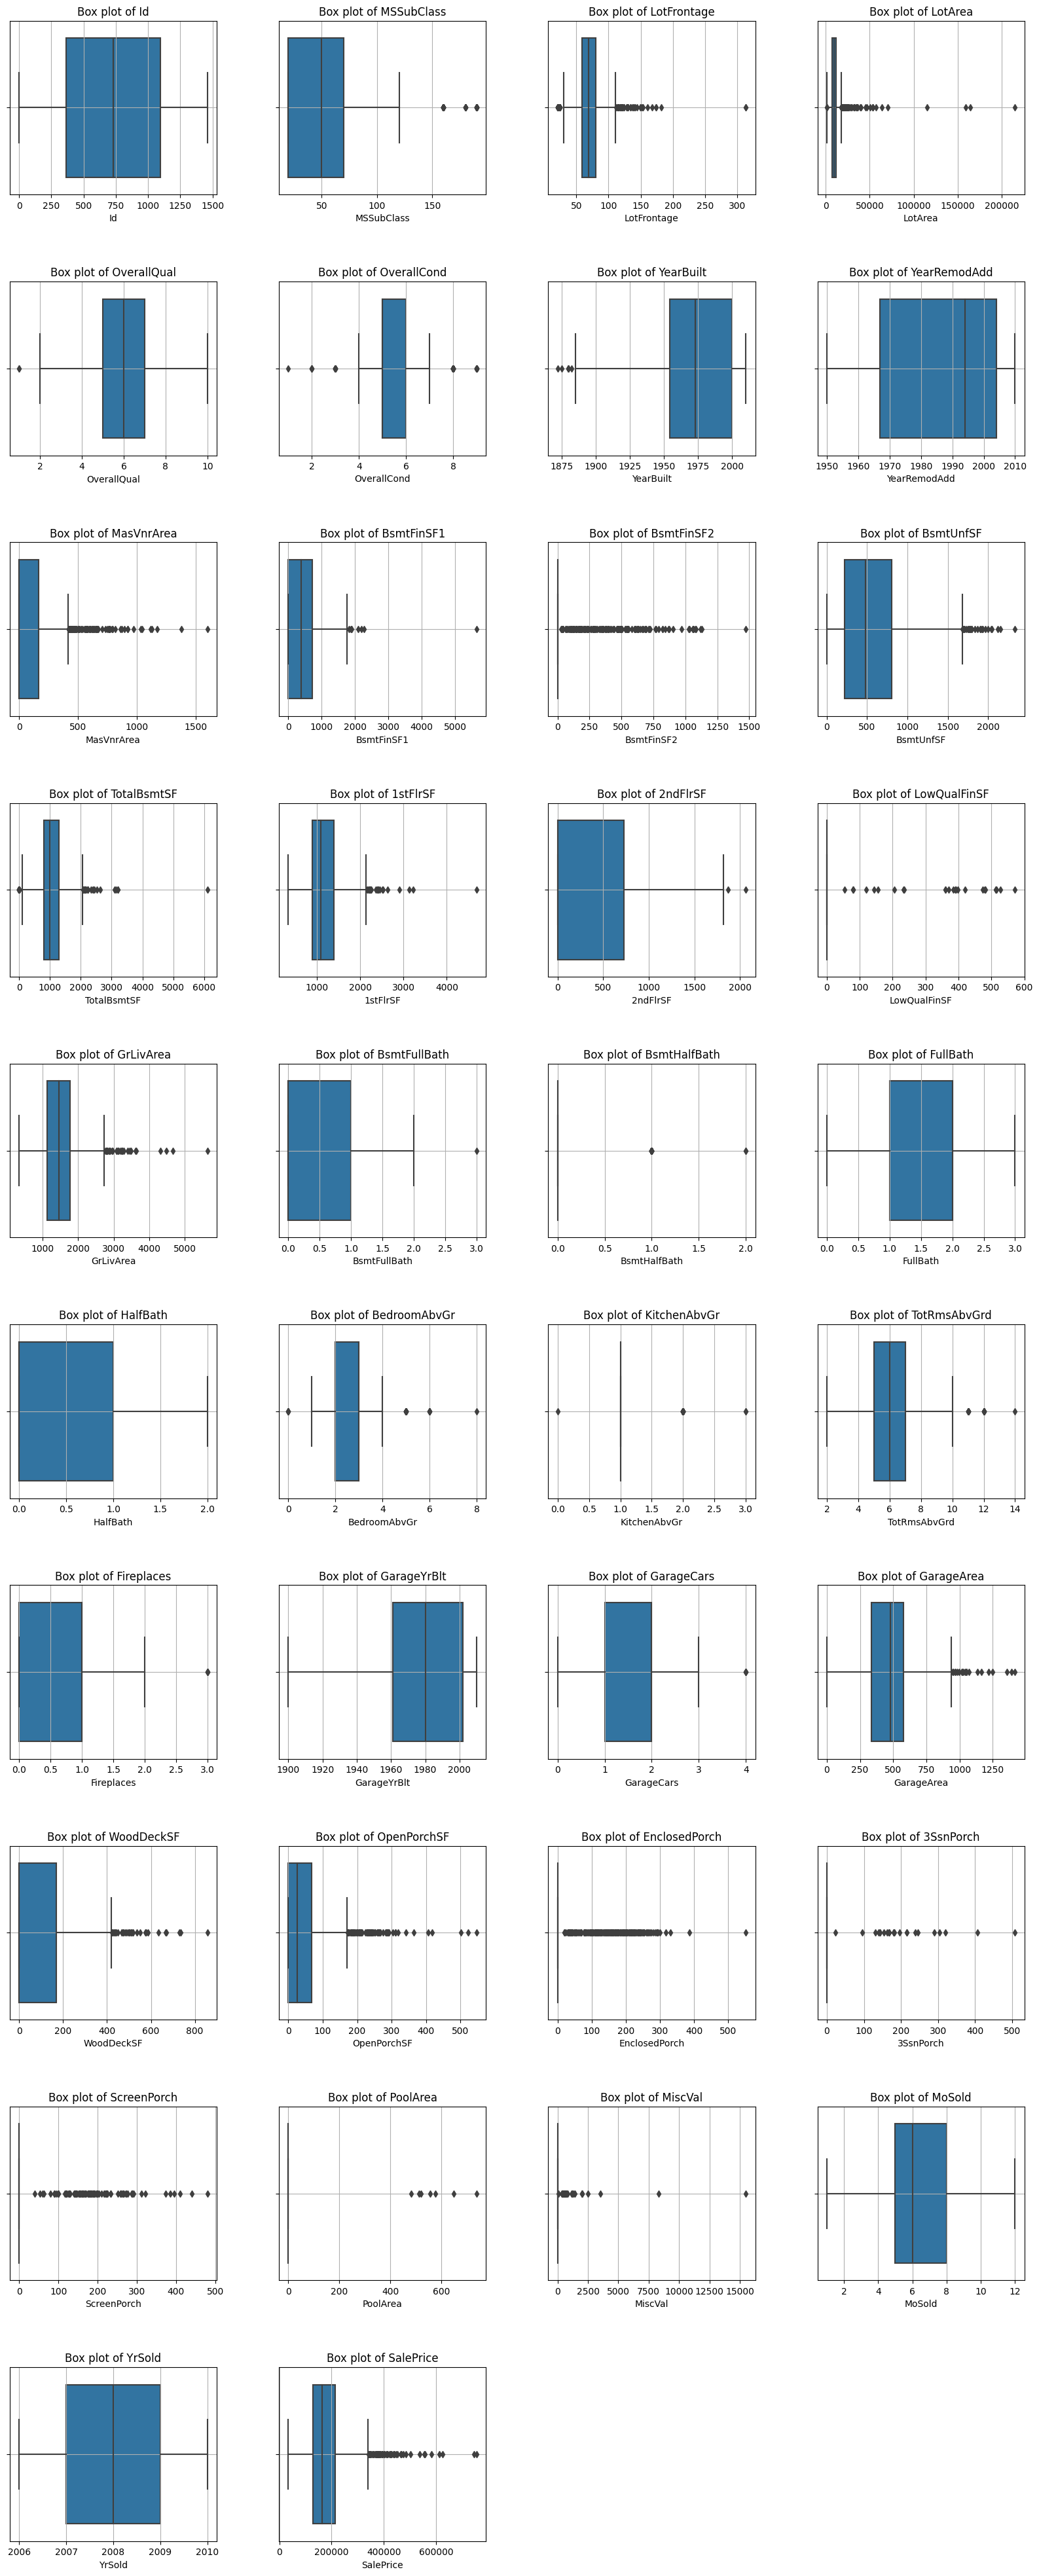

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out quantitative variables
quantitative_vars = train.select_dtypes(include=['int64', 'float64'])

# Determine the number of rows/columns for the subplot grid
num_vars = len(quantitative_vars.columns)
ncols = 4  # Number of columns in the subplot grid
nrows = (num_vars + ncols - 1) // ncols  # Compute number of rows needed

# Create a figure and axes for subplots
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjust spacing between plots

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot each box plot in its subplot
for i, column in enumerate(quantitative_vars.columns):
    sns.boxplot(x=quantitative_vars[column], ax=axs[i])
    axs[i].set_title(f'Box plot of {column}')
    axs[i].grid(True)

# Hide any unused axes if the number of plots isn't a perfect multiple of 'ncols'
for ax in axs[num_vars:]:
    ax.axis('off')

plt.show()


Box plots for qulitative variables

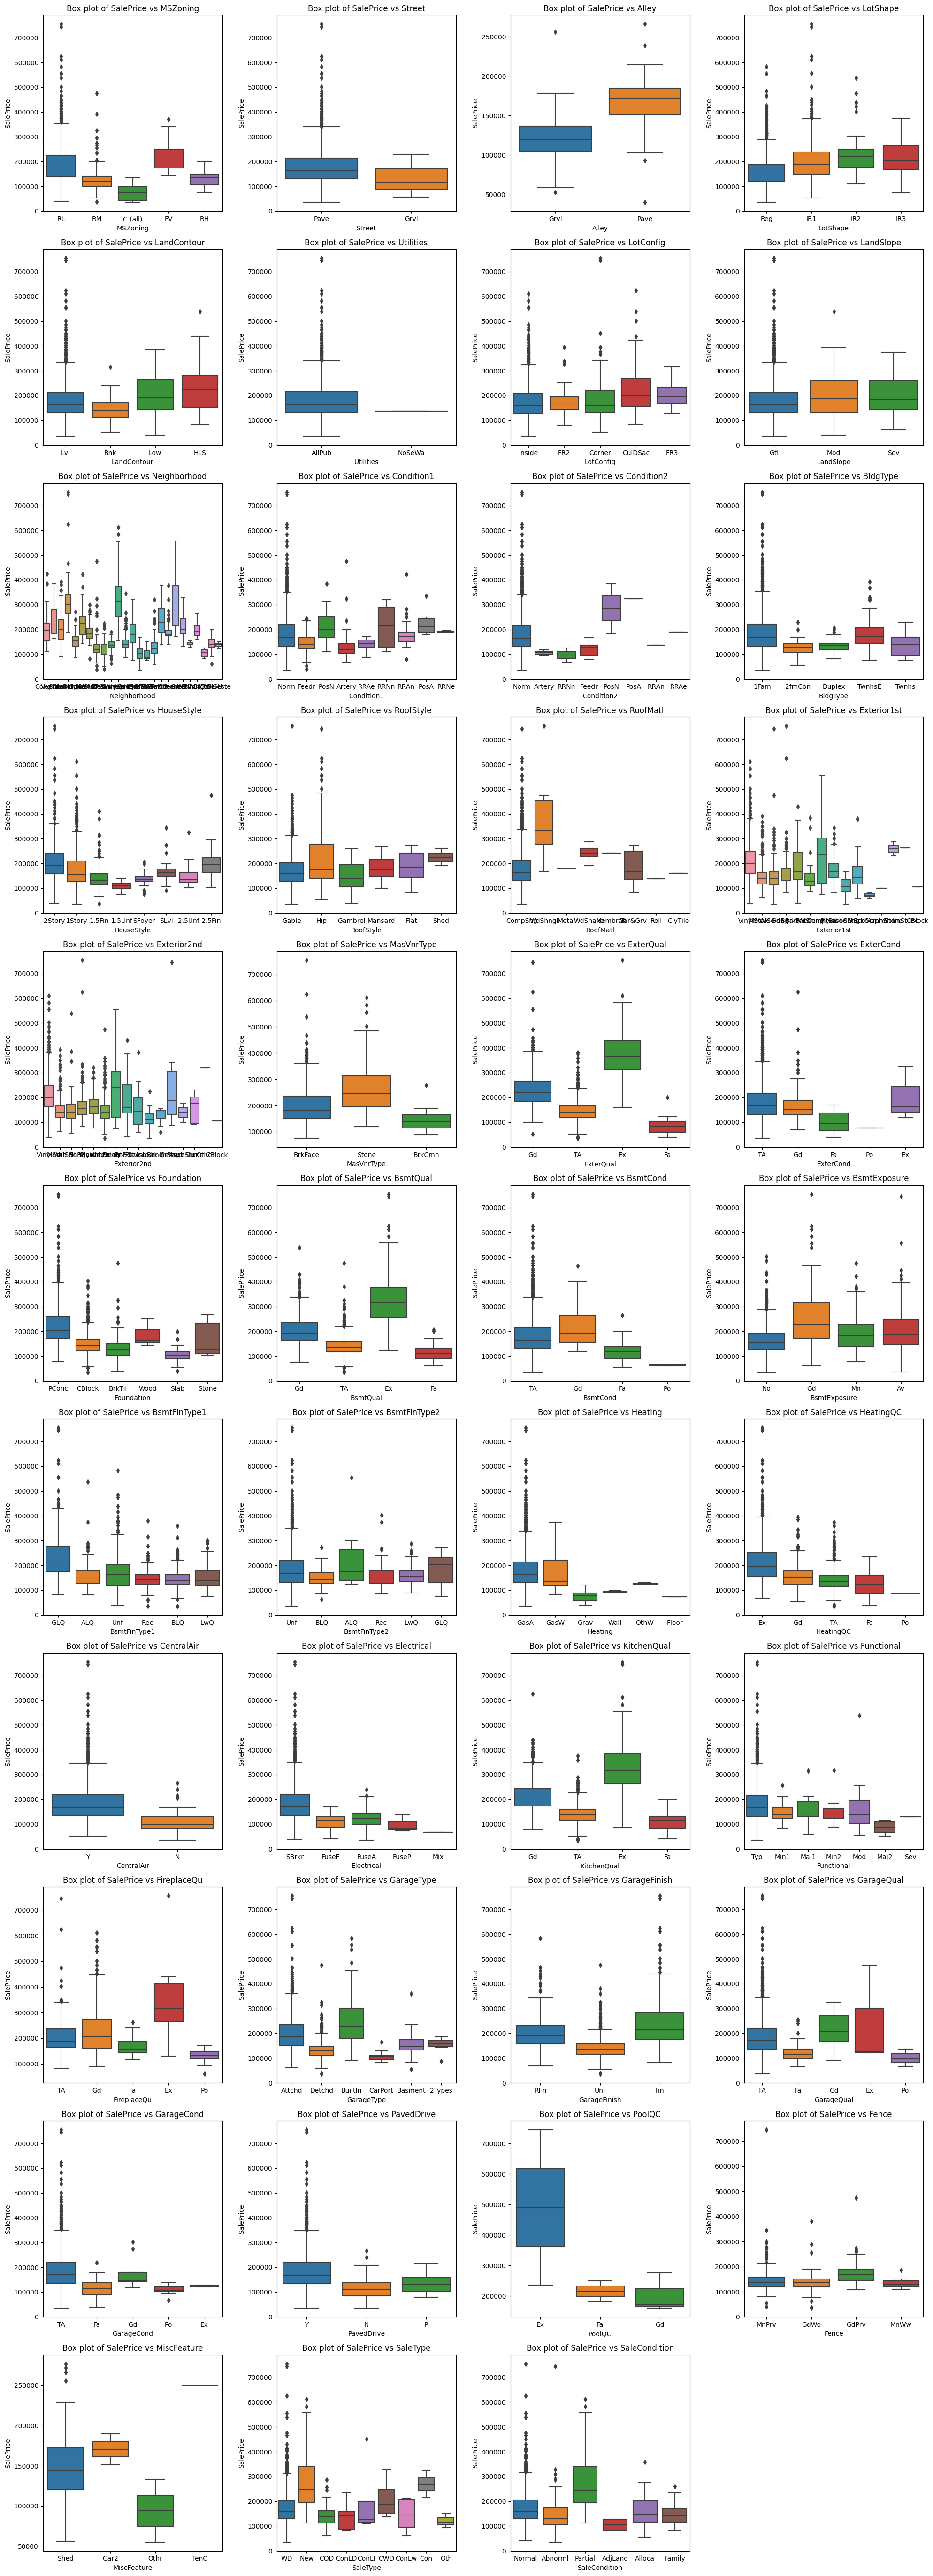

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical variables
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
# Identify quantitative variables
quantitative_columns = train.select_dtypes(include=['number']).columns.tolist()


# Determine the number of rows needed based on the number of categorical columns
num_rows = (len(categorical_columns) + 3) // 4  

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through the categorical columns to create box plots
for index, column in enumerate(categorical_columns):
    sns.boxplot(x=column, y='SalePrice', data=train, ax=axes[index])
    axes[index].set_title(f'Box plot of SalePrice vs {column}')
    axes[index].set_xlabel(column)
    axes[index].set_ylabel('SalePrice')

# Hide any unused axes if the number of categorical variables is not a multiple of 4
for index in range(len(categorical_columns), len(axes)):
    axes[index].set_visible(False)

plt.tight_layout()  
plt.show()


Heat Map for assessing correlation among features 

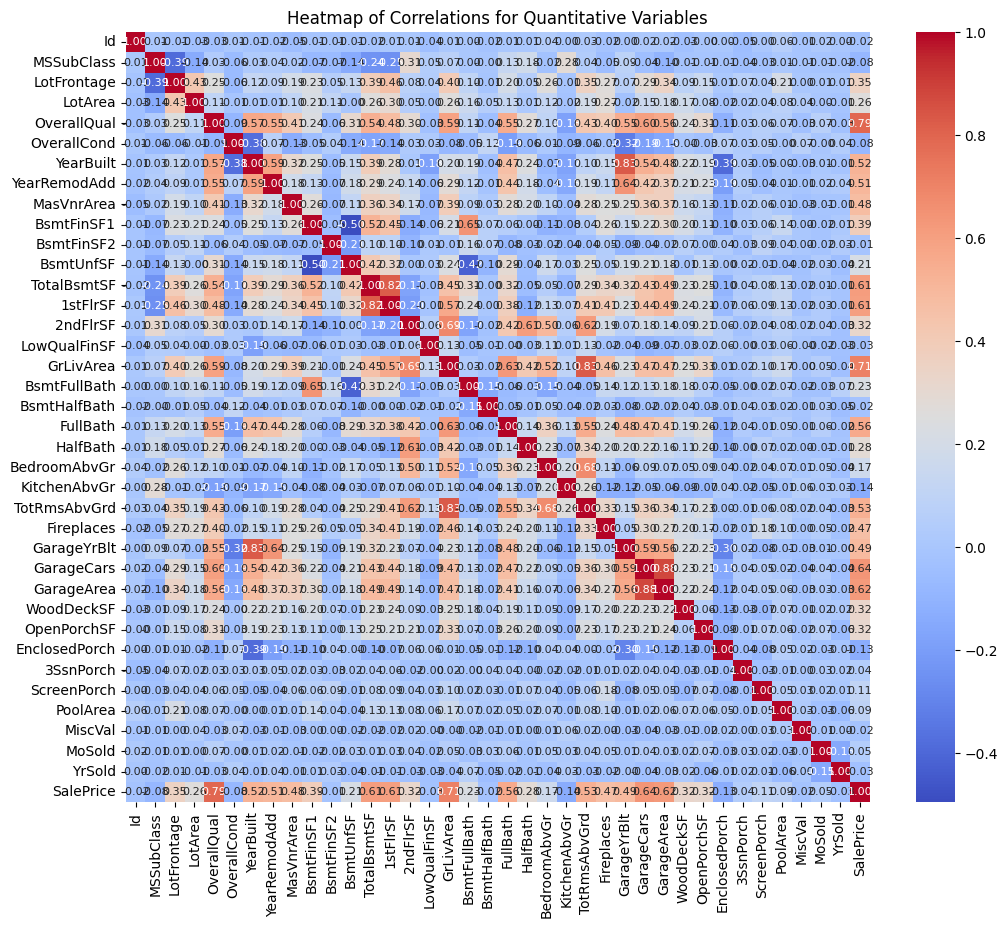

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Select only numeric columns for correlation matrix calculation
numeric_df = train.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Create heatmap with larger figure size and smaller font size for annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8})
plt.title('Heatmap of Correlations for Quantitative Variables')
plt.show()


Scetter plots in order to visualize data

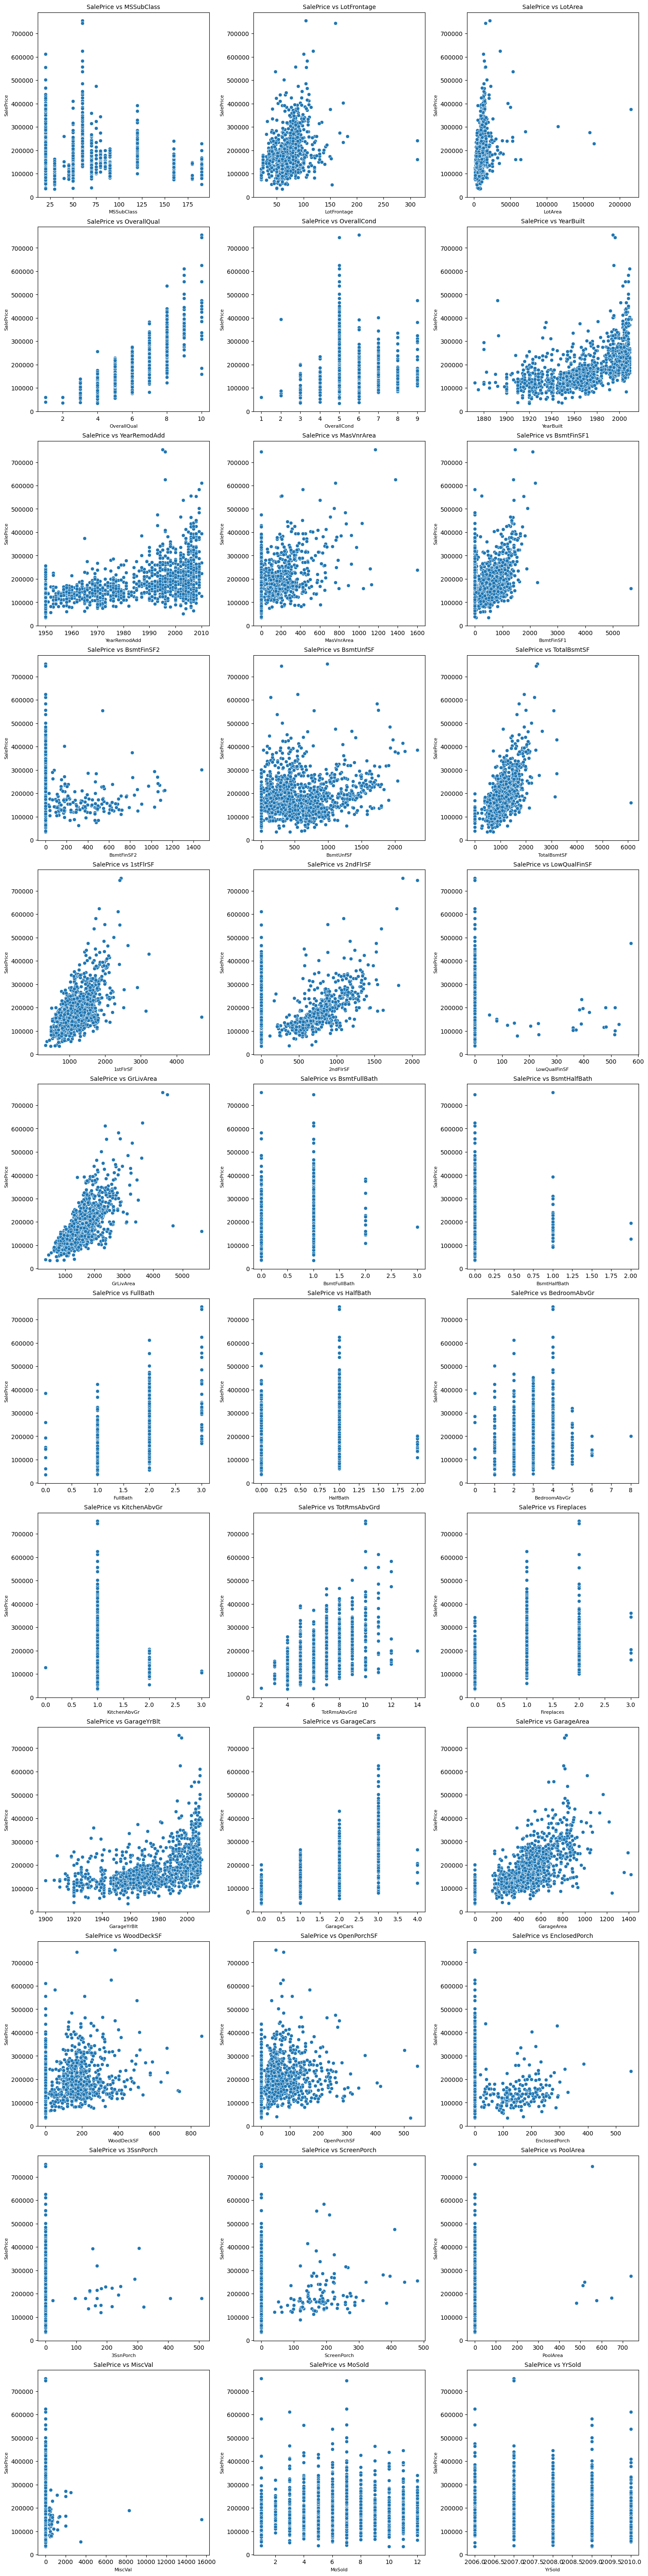

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out quantitative variables, exclude 'Id' as it's not a feature, and 'SalePrice' as it's the target
quantitative_columns = train.select_dtypes(include=['int64', 'float64']).columns.drop(['Id', 'SalePrice'])

# Determine the number of rows/columns for the subplot grid
num_vars = len(quantitative_columns)
ncols = 3  # Choose 3 columns for display purposes
nrows = (num_vars + ncols - 1) // ncols  # Compute number of rows needed

# Create a figure and axes for subplots with constrained layout for better spacing
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5), constrained_layout=True)

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Plot scatter plots for each quantitative variable against 'SalePrice'
for i, column in enumerate(quantitative_columns):
    sns.scatterplot(x=train[column], y=train['SalePrice'], ax=axs[i])
    axs[i].set_title(f'SalePrice vs {column}', fontsize=10)
    axs[i].set_xlabel(column, fontsize=8)
    axs[i].set_ylabel('SalePrice', fontsize=8)

# Hide any unused axes if the number of plots isn't a perfect multiple of 'ncols'
for ax in axs[num_vars:]:
    ax.set_visible(False)

plt.show()


3 Subplots scatter plots to show the outliers in the data set. 

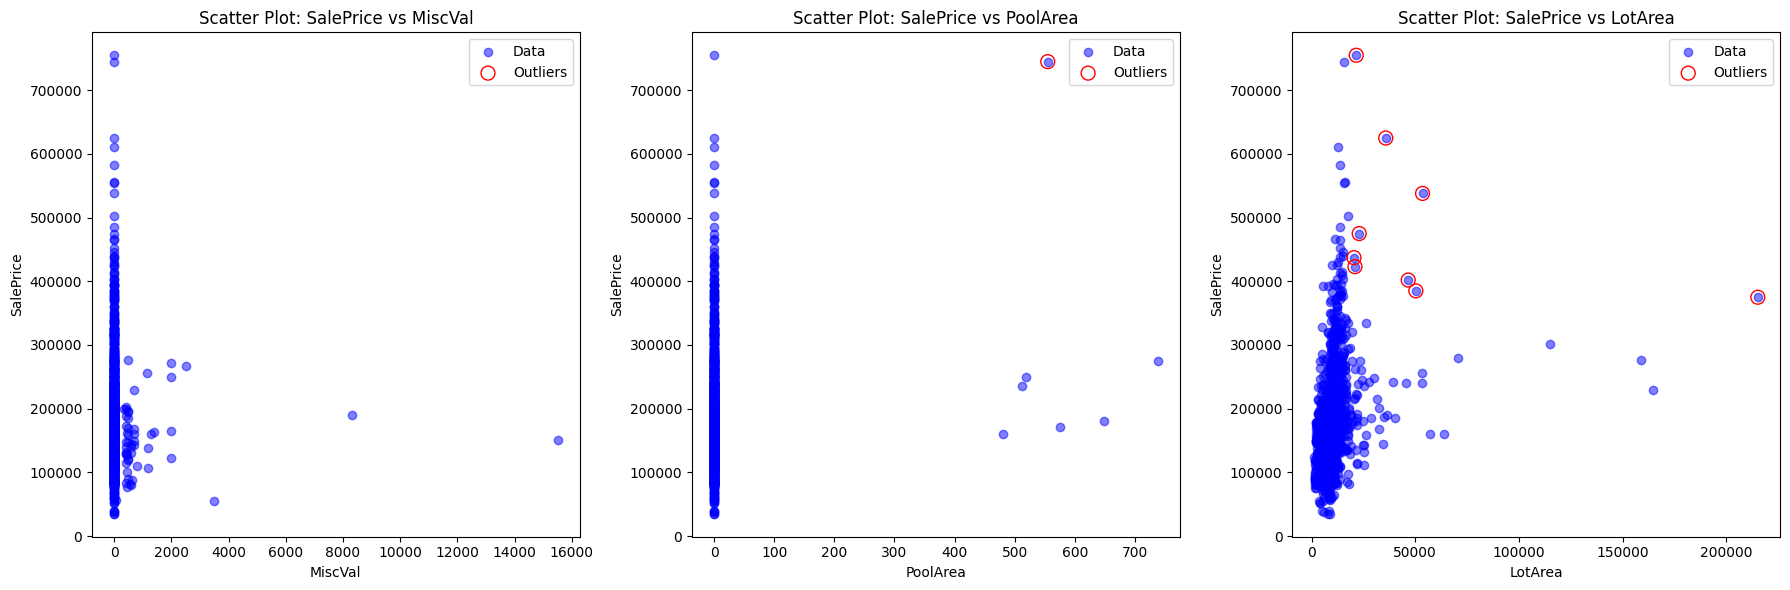

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Function to calculate outliers based on IQR
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (series < lower_bound) | (series > upper_bound)

# Corrected list of variables, replace 'MSZoning' with 'MiscVal'
variables = ['MiscVal', 'PoolArea', 'LotArea']

# Calculate outliers for 'SalePrice' and each specified variable
saleprice_outliers = find_outliers(train['SalePrice'])
outliers_dict = {var: find_outliers(train[var]) for var in variables}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Loop through the variables and plot the scatter plots
for i, var in enumerate(variables):
    # All data points
    axs[i].scatter(train[var], train['SalePrice'], color='blue', label='Data', alpha=0.5)
    
    # Overlapping outliers
    overlapping_outliers = saleprice_outliers & outliers_dict[var]
    axs[i].scatter(train[var][overlapping_outliers], train['SalePrice'][overlapping_outliers], 
                   color='red', marker='o', facecolors='none', edgecolors='r', s=100, label='Outliers')
    
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_title(f'Scatter Plot: SalePrice vs {var}')
    axs[i].legend()

plt.tight_layout()
plt.show()


Create other scatter plots to show outliers

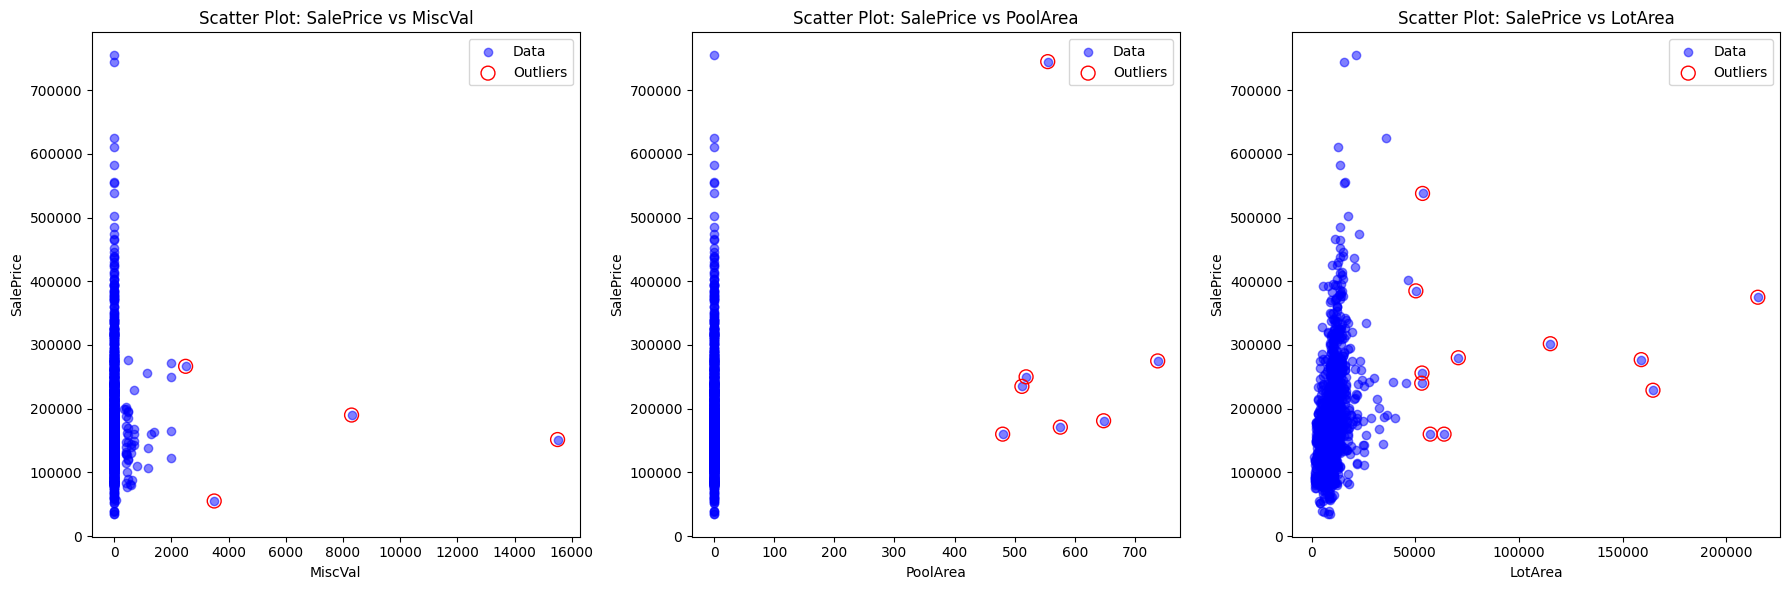

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Define thresholds for each variable
thresholds = {
    'MiscVal': 2000,
    'PoolArea': 100,
    'LotArea': 50000
}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Variables list for clarity in loop
variables = ['MiscVal', 'PoolArea', 'LotArea']

# Loop through the variables and plot the scatter plots
for i, var in enumerate(variables):
    # All data points
    axs[i].scatter(train[var], train['SalePrice'], color='blue', label='Data', alpha=0.5)
    
    # Condition for outliers based on threshold
    outliers_condition = train[var] > thresholds[var]
    
    # Highlight outliers
    axs[i].scatter(train[var][outliers_condition], train['SalePrice'][outliers_condition], 
                   color='red', marker='o', facecolors='none', edgecolors='r', s=100, label='Outliers')
    
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_title(f'Scatter Plot: SalePrice vs {var}')
    axs[i].legend()

plt.tight_layout()
plt.show()



Features that are the most correlated 

In [10]:
import pandas as pd

# Filter out quantitative variables
quantitative_variables = train.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix for quantitative variables
correlation_matrix = quantitative_variables.corr()

# Get the absolute values of correlations for all pairs of quantitative variables
correlation_values = correlation_matrix.abs()

# Stack the correlation matrix into a single column DataFrame and sort by correlation value
stacked_correlations = correlation_values.unstack().sort_values(ascending=False)

# Exclude self-correlation (correlation of a variable with itself)
stacked_correlations = stacked_correlations[stacked_correlations.index.get_level_values(0) != stacked_correlations.index.get_level_values(1)]

# Select the top 20 most correlated pairs
top_20_correlated = stacked_correlations.head(20)

# Display the variable names and their respective correlation values
for (var1, var2), correlation in top_20_correlated.items():
    print(f"{var1} and {var2}: {correlation}")


GarageArea and GarageCars: 0.882475414281462
GarageCars and GarageArea: 0.882475414281462
GarageYrBlt and YearBuilt: 0.8256674841743408
YearBuilt and GarageYrBlt: 0.8256674841743408
GrLivArea and TotRmsAbvGrd: 0.8254893743088425
TotRmsAbvGrd and GrLivArea: 0.8254893743088425
TotalBsmtSF and 1stFlrSF: 0.8195299750050339
1stFlrSF and TotalBsmtSF: 0.8195299750050339
OverallQual and SalePrice: 0.7909816005838053
SalePrice and OverallQual: 0.7909816005838053
SalePrice and GrLivArea: 0.7086244776126515
GrLivArea and SalePrice: 0.7086244776126515
2ndFlrSF and GrLivArea: 0.6875010641666033
GrLivArea and 2ndFlrSF: 0.6875010641666033
TotRmsAbvGrd and BedroomAbvGr: 0.676619935742649
BedroomAbvGr and TotRmsAbvGrd: 0.676619935742649
BsmtFullBath and BsmtFinSF1: 0.6492117535742649
BsmtFinSF1 and BsmtFullBath: 0.6492117535742649
YearRemodAdd and GarageYrBlt: 0.6422767797035356
GarageYrBlt and YearRemodAdd: 0.6422767797035356


Save the Id and Sale price because they will be dropped from the data set

In [11]:
target = train['SalePrice']
test_id = test['Id']

Find and drop the outliers in the data set. By looking at the scatter plot of every varible, these extreme outliers have been spotted: values = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]
and will be dropped from the data set. Decide to not drop outliers in a first moment

In [12]:
# Define the list of IDs to drop
##ids_to_drop = [598, 955, 935, 1299, 250, 314, 336, 707, 379, 1183, 692, 186, 441, 186, 524, 739, 598, 955, 636, 1062, 1191, 496, 198, 1338]

# Drop rows with the specified IDs
#train = train.drop(ids_to_drop)
#test = test.drop(ids_to_drop)

# Print the shape of the cleaned DataFrame to verify rows have been dropped
#print("Shape of test after dropping rows:", test.shape)
#print("Shape of train after dropping rows:", train.shape)


Drop the Id values and Sale price from train set. 

In [13]:

train_df = train.drop(['Id', 'SalePrice'], axis=1)
test_df = test.drop(['Id'], axis=1)

Concatenate the train and test set in order to fill the missing values. 

In [14]:
concatenated_df = pd.concat([train_df, test_df], axis=0)

# Reset the index
concatenated_df.reset_index(drop=True, inplace=True)

create a new concatenated data set in order to do the adjustements.

In [15]:
concatenated_df_1 = concatenated_df.copy()

In [16]:
 concatenated_df_1

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2914         160       RM         21.0     1936   Pave   NaN      Reg   
2915         160       RM         21.0     1894   Pave   NaN      Reg   
2916          20       RL        160.0    20000   Pave   NaN      Reg   
2917          85       RL         62.0    10441   Pave   NaN      Reg   
2918          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
2            Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
3            Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
4            Lvl    AllPub       FR2  ...           0        0    NaN    NaN   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2914         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2915         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2916         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
2917         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
2918         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0       2    2008        WD         Normal  
1            NaN       0       5    2007        WD         Normal  
2            NaN       0       9    2008        WD         Normal  
3            NaN       0       2    2006        WD        Abnorml  
4            NaN       0      12    2008        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2914         NaN       0       6    2006        WD         Normal  
2915         NaN       0       4    2006        WD        Abnorml  
2916         NaN       0       9    2006        WD        Abnorml  
2917        Shed     700       7    2006        WD         Normal  
2918         NaN       0      11    2006        WD         Normal  

[2919 rows x 79 columns]

Change the type of MSSubClass as it is categorical and not a quantitative variable      

In [17]:
concatenated_df_1['MSSubClass'] = concatenated_df_1['MSSubClass'].astype(str)

Visualize the missing values 

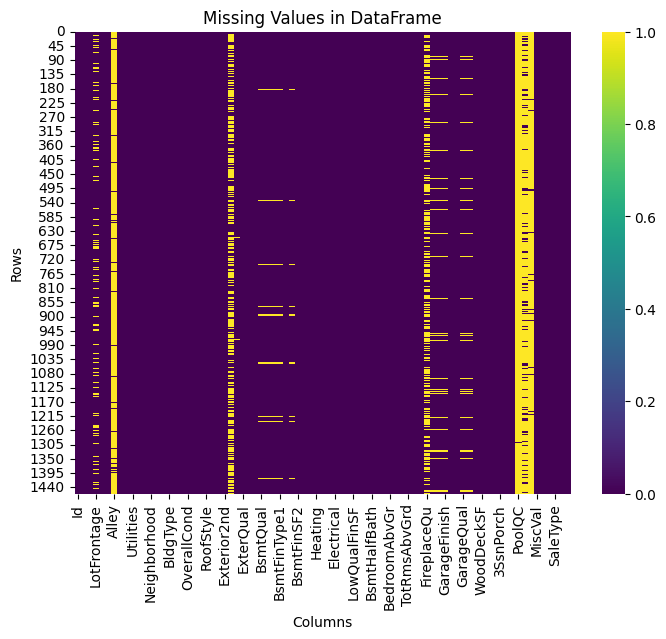

In [18]:
import seaborn as sns


import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))  
sns.heatmap(train.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values in DataFrame')  # Add a title to the plot
plt.xlabel('Columns')  # Add label for the x-axis
plt.ylabel('Rows')  # Add label for the y-axis
plt.show()


Same for the test set 

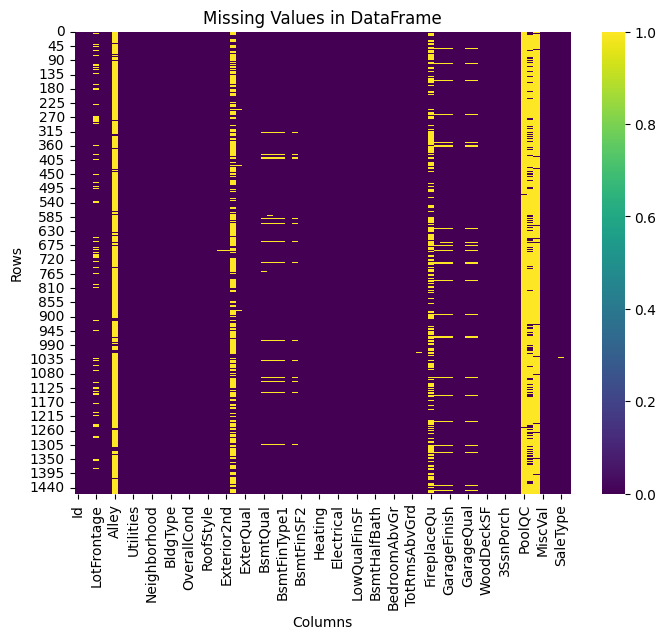

In [19]:
import seaborn as sns


import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))  
sns.heatmap(test.isnull(), cmap='viridis', cbar=True)
plt.title('Missing Values in DataFrame')  # Add a title to the plot
plt.xlabel('Columns')  # Add label for the x-axis
plt.ylabel('Rows')  # Add label for the y-axis
plt.show()


Get the missing values for categorical features

In [20]:
# Select only the object columns
object_columns = concatenated_df_1.select_dtypes(include=['object'])

# Get the object columns with at least one missing value
object_columns_with_missing_values = object_columns.columns[object_columns.isna().any()].tolist()

# Print the names of object columns with missing values
print("Object columns with missing values:")
print(object_columns_with_missing_values)



Object columns with missing values:
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


Spot the constant fill columns and the mode fill columns directly by watching to the data information 

In [21]:
constant_fill_columns = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]
mode_fill_columns = [
    'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
    'Electrical', 'KitchenQual', 'Functional', 'SaleType'
]

Fill with the mode the mode_fill_coluns

In [22]:
# Fill missing values with mode
for column in mode_fill_columns:
    concatenated_df_1[column] = concatenated_df_1[column].fillna(concatenated_df_1[column].mode()[0])

Fill with "None" the constan_fill_columns

In [23]:
constant_fill_columns = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]

# Fill missing values with "None"
for column in constant_fill_columns:
    concatenated_df_1[column] = concatenated_df_1[column].fillna("None")


In [24]:
concatenated_df_2 = concatenated_df_1.copy()

Fill the numerical missing values with KNN

In [ ]:

pip install scikit-learn


In [26]:
from sklearn.impute import KNNImputer

def knn_impute_quantitative(df, k=5):
    # Identify quantitative columns
    quantitative_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Create a copy of the dataframe to avoid modifying the original
    df_copy = df.copy()
    
    # Initialize KNNImputer
    imputer = KNNImputer(n_neighbors=k)
    
    # Impute missing values for quantitative columns
    df_copy[quantitative_cols] = imputer.fit_transform(df_copy[quantitative_cols])
    
    return df_copy


concatenated_df_2 = knn_impute_quantitative(concatenated_df_1)


Check if there are any other missing values

In [27]:
are_missing_values_remaining = concatenated_df_2.isna().any().any()
if are_missing_values_remaining:
    print("There are still missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")



There are no missing values in the DataFrame.


In [28]:
columns_with_missing_values = concatenated_df_2.columns[concatenated_df_2.isnull().any()].tolist()
print("Columns with missing values:")
print(columns_with_missing_values)


Columns with missing values:
[]


In [29]:
concatenated_df_2

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0            60       RL         65.0   8450.0   Pave  None      Reg   
1            20       RL         80.0   9600.0   Pave  None      Reg   
2            60       RL         68.0  11250.0   Pave  None      IR1   
3            70       RL         60.0   9550.0   Pave  None      IR1   
4            60       RL         84.0  14260.0   Pave  None      IR1   
...         ...      ...          ...      ...    ...   ...      ...   
2914        160       RM         21.0   1936.0   Pave  None      Reg   
2915        160       RM         21.0   1894.0   Pave  None      Reg   
2916         20       RL        160.0  20000.0   Pave  None      Reg   
2917         85       RL         62.0  10441.0   Pave  None      Reg   
2918         60       RL         74.0   9627.0   Pave  None      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
1            Lvl    AllPub       FR2  ...         0.0      0.0   None   None   
2            Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
3            Lvl    AllPub    Corner  ...         0.0      0.0   None   None   
4            Lvl    AllPub       FR2  ...         0.0      0.0   None   None   
...          ...       ...       ...  ...         ...      ...    ...    ...   
2914         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
2915         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
2916         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   
2917         Lvl    AllPub    Inside  ...         0.0      0.0   None  MnPrv   
2918         Lvl    AllPub    Inside  ...         0.0      0.0   None   None   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0           None     0.0     2.0  2008.0        WD         Normal  
1           None     0.0     5.0  2007.0        WD         Normal  
2           None     0.0     9.0  2008.0        WD         Normal  
3           None     0.0     2.0  2006.0        WD        Abnorml  
4           None     0.0    12.0  2008.0        WD         Normal  
...          ...     ...     ...     ...       ...            ...  
2914        None     0.0     6.0  2006.0        WD         Normal  
2915        None     0.0     4.0  2006.0        WD        Abnorml  
2916        None     0.0     9.0  2006.0        WD        Abnorml  
2917        Shed   700.0     7.0  2006.0        WD         Normal  
2918        None     0.0    11.0  2006.0        WD         Normal  

[2919 rows x 79 columns]

In [30]:

# Age of the house since its last remodeling at the time it was sold
concatenated_df_2['houseremodelage'] = concatenated_df_2['YrSold'] - concatenated_df_2['YearRemodAdd']

# Total square footage of livable area in the house
concatenated_df_2['totalsf'] = concatenated_df_2['1stFlrSF'] + concatenated_df_2['2ndFlrSF'] + concatenated_df_2['BsmtFinSF1'] + concatenated_df_2['BsmtFinSF2']

# Total area (above-ground living space + basement area)
concatenated_df_2['totalarea'] = concatenated_df_2['GrLivArea'] + concatenated_df_2['TotalBsmtSF']

# Total bathrooms calculation
concatenated_df_2['totalbaths'] = concatenated_df_2['BsmtFullBath'] + concatenated_df_2['FullBath'] + 0.5 * (concatenated_df_2['BsmtHalfBath'] + concatenated_df_2['HalfBath'])

# Total porch square footage
concatenated_df_2['totalporchsf'] = concatenated_df_2['OpenPorchSF'] + concatenated_df_2['3SsnPorch'] + concatenated_df_2['EnclosedPorch'] + concatenated_df_2['ScreenPorch'] + concatenated_df_2['WoodDeckSF']

#Square footage per room in the house. 
concatenated_df_2["SqFtPerRoom"] = concatenated_df_2["GrLivArea"] / (concatenated_df_2["TotRmsAbvGrd"] +
                                             concatenated_df_2["FullBath"] +
                                             concatenated_df_2["HalfBath"] +
                                             concatenated_df_2["KitchenAbvGr"])
#Overall quality of the home
concatenated_df_2['Total_Home_Quality'] = concatenated_df_2['OverallQual'] + concatenated_df_2['OverallCond']




Apply the log transformation to the variables that have a skew higher than 0.5

In [31]:
import numpy as np

# Compute skewness for quantitative variables
skewness = concatenated_df_2.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew())

# Identify columns with skewness greater than 0.5
skewed_columns = skewness[skewness > 0.5].index

# Apply log transformation to skewed columns
for column in skewed_columns:
    concatenated_df_2[column] = np.log1p(concatenated_df_2[column])


In [32]:
concatenated_df_3 = concatenated_df_2.copy()

Cosine transormation to MoSold

In [33]:
import numpy as np

# Calculate the shifted cosine transformation
concatenated_df_3['MoSold_cos_shifted'] = np.cos(((concatenated_df_2['MoSold'] - 0.5) / 12) * np.pi)

#Drop the original 'MoSold' 
concatenated_df_3.drop(columns=['MoSold'], inplace=True)



In [34]:
concatenated_df_4 = concatenated_df_3.copy()

Transform in dummies the categorical variables. 

In [35]:
# Get dummy variables for categorical variables in concatenated_df_4
concatenated_df_4 = pd.get_dummies(concatenated_df_4)

In [36]:
concatenated_df_5  = concatenated_df_4.copy()

Scale the data set

In [37]:
# Calculate summary statistics for concatenated_df_5
summary_stats = concatenated_df_5.describe()

# Display summary statistics
summary_stats


LotFrontage      LotArea  OverallQual  OverallCond    YearBuilt  \
count  2919.000000  2919.000000  2919.000000  2919.000000  2919.000000   
mean      4.209526     9.094915     6.089072     1.867152  1971.312778   
std       0.340606     0.509882     1.409947     0.173171    30.291442   
min       3.091042     7.170888     1.000000     0.693147  1872.000000   
25%       4.110874     8.919854     5.000000     1.791759  1953.500000   
50%       4.262680     9.154193     6.000000     1.791759  1973.000000   
75%       4.394449     9.356257     7.000000     1.945910  2001.000000   
max       5.749393    12.279537    10.000000     2.302585  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   2919.000000  2919.000000  2919.000000  2919.000000  2919.000000  ...   
mean    1984.264474     2.111004     4.226471     0.682190     5.627498  ...   
std       20.894344     2.625729     2.980817     1.879238     1.866549  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1965.000000     0.000000     0.000000     0.000000     5.398163  ...   
50%     1993.000000     0.000000     5.910797     0.000000     6.148468  ...   
75%     2004.000000     5.111988     6.598509     0.000000     6.692083  ...   
max     2010.000000     7.378384     8.638525     7.331060     7.756623  ...   

           MiscVal       YrSold  houseremodelage      totalsf    totalarea  \
count  2919.000000  2919.000000      2919.000000  2919.000000  2919.000000   
mean      0.234767  2007.792737        23.528263     7.528398     7.797659   
std       1.240206     1.314964        20.892061     0.365194     0.312320   
min       0.000000  2006.000000        -2.000000     5.814131     5.814131   
25%       0.000000  2007.000000         4.000000     7.305188     7.603399   
50%       0.000000  2008.000000        15.000000     7.522400     7.805475   
75%       0.000000  2009.000000        43.000000     7.774015     8.005367   
max       9.741027  2010.000000        60.000000     9.331407     9.371864   

        totalbaths  totalporchsf  SqFtPerRoom  Total_Home_Quality  \
count  2919.000000   2919.000000  2919.000000         2919.000000   
mean      2.218534      4.287988     5.048440           11.653649   
std       0.809091      2.038110     0.171523            1.712435   
min       1.000000      0.000000     4.411585            2.000000   
25%       1.500000      3.891820     4.928288           11.000000   
50%       2.000000      5.105945     5.045267           12.000000   
75%       2.500000      5.589118     5.155217           13.000000   
max       7.000000      7.261927     5.868237           19.000000   

       MoSold_cos_shifted  
count         2919.000000  
mean             0.068192  
std              0.576009  
min             -0.991445  
25%             -0.382683  
50%              0.130526  
75%              0.608761  
max              0.991445  

[8 rows x 42 columns]

In [38]:
from sklearn.preprocessing import RobustScaler

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(concatenated_df_5)

# Convert the scaled data back to a DataFrame
concatenated_df_5 = pd.DataFrame(scaled_data, columns=concatenated_df_5.columns, index=concatenated_df_5.index)


Analyze the target variable

In [39]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, anderson

# Shapiro-Wilk Test for Normality
stat, p_value_normal = shapiro(target)

# Anderson-Darling Test for Log-normality (testing log-transformed data)
log_target = np.log(target)
result_log_normal = anderson(log_target, dist='logistic')

# Setting significance level threshold
significance_level = 0.05

# Determining if the data follows normal distribution
is_normal = p_value_normal > significance_level

# Determining if the data follows log-normal distribution
is_log_normal = False
for i in range(len(result_log_normal.critical_values)):
    if result_log_normal.statistic < result_log_normal.critical_values[i]:
        is_log_normal = True
        break

print("Is the data normally distributed?", is_normal)
print("Is the data log-normally distributed?", is_log_normal)


Is the data normally distributed? False
Is the data log-normally distributed? False


Distribution of SalePrice

In [ ]:
pip install matplotlib


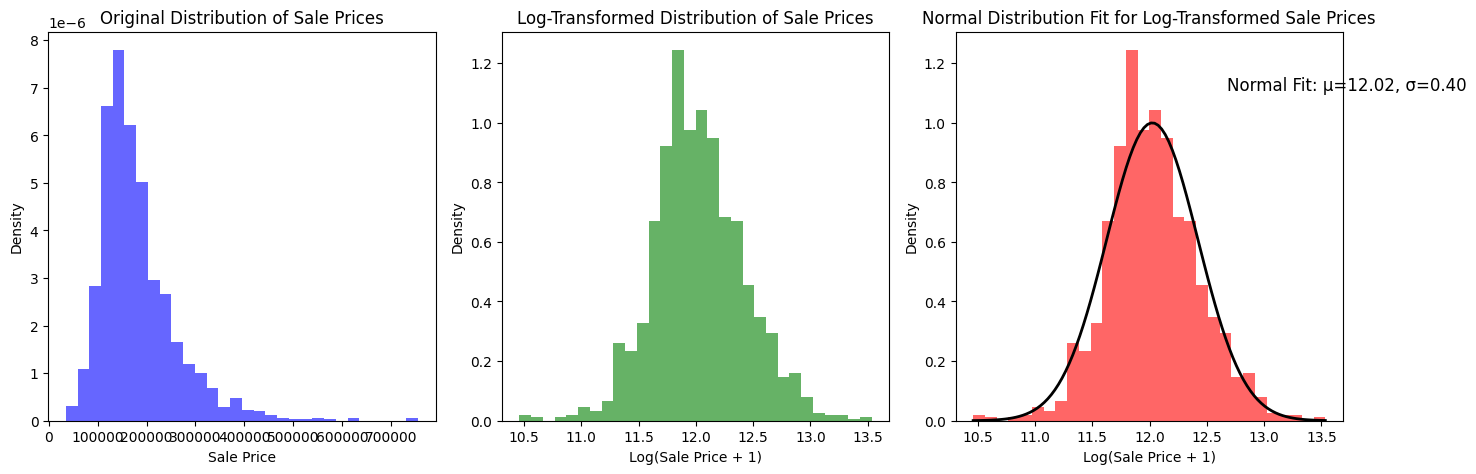

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm


target = train['SalePrice']

# Plotting
fig, ax = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize to make each subplot less stretched

# Original Distribution
ax[0].hist(target, bins=30, density=True, alpha=0.6, color='b')
ax[0].set_title('Original Distribution of Sale Prices')
ax[0].set_xlabel('Sale Price')
ax[0].set_ylabel('Density')

# Log Transformation
log_target = np.log1p(target)
ax[1].hist(log_target, bins=30, density=True, alpha=0.6, color='g')
ax[1].set_title('Log-Transformed Distribution of Sale Prices')
ax[1].set_xlabel('Log(Sale Price + 1)')
ax[1].set_ylabel('Density')

# Normal Distribution Fit on Log-Transformed Data
log_mu, log_std = norm.fit(log_target)
log_x = np.linspace(min(log_target), max(log_target), 100)
log_p = norm.pdf(log_x, log_mu, log_std)
ax[2].hist(log_target, bins=30, density=True, alpha=0.6, color='r')
ax[2].plot(log_x, log_p, 'k', linewidth=2)
lognormal_label = f"Normal Fit: μ={log_mu:.2f}, σ={log_std:.2f}"
ax[2].set_title('Normal Distribution Fit for Log-Transformed Sale Prices')
ax[2].set_xlabel('Log(Sale Price + 1)')
ax[2].set_ylabel('Density')
ax[2].annotate(lognormal_label, xy=(0.7, 0.85), xycoords='axes fraction', fontsize=12, color='black')

plt.tight_layout()
plt.show()



Log of 'SalePrice'

In [42]:
log_target = np.log(target)

At the beginning we combined the data sets, now we have to split them into train and test set

In [43]:
train_final = concatenated_df_5.loc[:train.index.max(), :].copy()
test_final = concatenated_df_5.loc[train.index.max() + 1:, :].reset_index(drop=True).copy()

In [44]:
train_final

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0       -0.257516 -0.256995          0.5     0.000000   0.631579   
1        0.464671  0.035356          0.0     2.630317   0.063158   
2       -0.100761  0.398758          0.5     0.000000   0.589474   
3       -0.535329  0.023391          0.5     0.000000  -1.221053   
4        0.634651  0.941998          1.0     0.000000   0.568421   
...           ...       ...          ...          ...        ...   
1455    -0.421564 -0.406274          0.0     0.000000   0.547368   
1456     0.675896  0.760671          0.0     1.000000   0.105263   
1457    -0.204486 -0.101848          0.5     3.313807  -0.673684   
1458    -0.100761  0.063111         -0.5     1.000000  -0.484211   
1459     0.239984  0.114408         -0.5     1.000000  -0.168421   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0         0.256410    1.033493    0.098543    0.000000  -0.874234  ...   
1        -0.435897    0.000000    0.147872    0.000000  -0.383315  ...   
2         0.230769    0.996432    0.042050    0.000000  -0.056512  ...   
3        -0.589744    0.000000   -0.080457    0.000000   0.112025  ...   
4         0.179487    1.146479    0.087196    0.000000   0.037078  ...   
...            ...         ...         ...         ...        ...  ...   
1455      0.179487    0.000000   -0.895778    0.000000   0.550417  ...   
1456     -0.128205    0.936523    0.115557    5.099866   0.179033  ...   
1457      0.333333    0.000000   -0.044009    0.000000   0.486257  ...   
1458      0.076923    0.000000   -0.302913    6.937314  -4.751814  ...   
1459     -0.717949    0.000000    0.123033    5.673323  -0.949430  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0.0           0.0           0.0          0.0   
1                0.0           0.0           0.0          0.0   
2                0.0           0.0           0.0          0.0   
3                0.0           0.0           0.0          0.0   
4                0.0           0.0           0.0          0.0   
...              ...           ...           ...          ...   
1455             0.0           0.0           0.0          0.0   
1456             0.0           0.0           0.0          0.0   
1457             0.0           0.0           0.0          0.0   
1458             0.0           0.0           0.0          0.0   
1459             0.0           0.0           0.0          0.0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                       0.0                    0.0                   0.0   
1                       0.0                    0.0                   0.0   
2                       0.0                    0.0                   0.0   
3                       1.0                    0.0                   0.0   
4                       0.0                    0.0                   0.0   
...                     ...                    ...                   ...   
1455                    0.0                    0.0                   0.0   
1456                    0.0                    0.0                   0.0   
1457                    0.0                    0.0                   0.0   
1458                    0.0                    0.0                   0.0   
1459                    0.0                    0.0                   0.0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                      0.0                   0.0                    0.0  
1                      0.0                   0.0                    0.0  
2                      0.0                   0.0                    0.0  
3                      0.0                  -1.0                    0.0  
4                      0.0                   0.0                    0.0  
...                    ...                   ...                    ...  
1455                   0.0                   0.0                    0.0  
1456          

In [45]:
test_final

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0        0.464671  0.473297         -0.5     1.000000  -0.252632   
1        0.507940  0.943123          0.0     1.000000  -0.315789   
2        0.193276  0.871843         -0.5     0.000000   0.505263   
3        0.376507  0.123842          0.0     1.000000   0.526316   
4       -1.687348 -1.456913          1.0     0.000000   0.400000   
...           ...       ...          ...          ...        ...   
1454    -4.131663 -3.632648         -1.0     1.866239  -0.063158   
1455    -4.131663 -3.682880         -1.0     0.000000  -0.063158   
1456     2.887150  1.717094         -0.5     1.866239  -0.273684   
1457    -0.421564  0.227767         -0.5     0.000000   0.400000   
1458     0.193276  0.041791          0.5     0.000000   0.421053   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  \
0        -0.820513    0.000000    0.036342    4.976734  -0.422244  ...   
1        -0.897436    0.917715    0.139110    0.000000  -0.107932  ...   
2         0.128205    0.000000    0.115748    0.000000  -0.943810  ...   
3         0.128205    0.595565    0.074429    0.000000  -0.281813  ...   
4        -0.025641    0.000000   -0.050746    0.000000   0.600599  ...   
...            ...         ...         ...         ...        ...  ...   
1454     -0.589744    0.000000   -0.895778    0.000000   0.120549  ...   
1455     -0.589744    0.000000   -0.057196    0.000000  -0.356663  ...   
1456      0.076923    0.000000    0.181844    0.000000  -4.751814  ...   
1457     -0.025641    0.000000   -0.013299    0.000000   0.160473  ...   
1458      0.025641    0.890823    0.109298    0.000000  -0.519356  ...   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                0.0           0.0           0.0          0.0   
1                0.0           0.0           0.0          0.0   
2                0.0           0.0           0.0          0.0   
3                0.0           0.0           0.0          0.0   
4                0.0           0.0           0.0          0.0   
...              ...           ...           ...          ...   
1454             0.0           0.0           0.0          0.0   
1455             0.0           0.0           0.0          0.0   
1456             0.0           0.0           0.0          0.0   
1457             0.0           0.0           0.0          0.0   
1458             0.0           0.0           0.0          0.0   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                       0.0                    0.0                   0.0   
1                       0.0                    0.0                   0.0   
2                       0.0                    0.0                   0.0   
3                       0.0                    0.0                   0.0   
4                       0.0                    0.0                   0.0   
...                     ...                    ...                   ...   
1454                    0.0                    0.0                   0.0   
1455                    1.0                    0.0                   0.0   
1456                    1.0                    0.0                   0.0   
1457                    0.0                    0.0                   0.0   
1458                    0.0                    0.0                   0.0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                      0.0                   0.0                    0.0  
1                      0.0                   0.0                    0.0  
2                      0.0                   0.0                    0.0  
3                      0.0                   0.0                    0.0  
4                      0.0                   0.0                    0.0  
...                    ...                   ...                    ...  
1454                   0.0                   0.0                    0.0  
1455          

Select the model

In [46]:
!pip install pycaret


In [47]:
pip list

Package                       Version
----------------------------- ------------
absl-py                       2.1.0
aiobotocore                   2.7.0
aiohttp                       3.9.3
aioitertools                  0.7.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.4
anaconda-navigator            2.5.2
anaconda-project              0.11.1
anyio                         4.2.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
archspec                      0.2.1
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.3.4
asttokens                     2.0.5
astunparse                    1.6.3
async-lru    

In [ ]:
pip install --force-reinstall pycaret

In [49]:

from pycaret.regression import setup, compare_models

# Concatenating train_final and log_target along axis 1
data = pd.concat([train_final, pd.DataFrame(log_target, columns=['SalePrice'])], axis=1)

# Setting up the data for modeling
setup(data=data, target='SalePrice')


In [50]:
compare_models()


### CatBoostingRegression

In [ ]:

from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor()

# Define features (test_final) and target (log_target)
X = train_final
y = log_target

# Define KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(catboost_model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to RMSE (root mean squared error)
rmse_scores = np.sqrt(-cv_scores)

# Print average RMSE
print("Average RMSE in log:", np.mean(rmse_scores))



Get back to the original target because we applied a log 

In [52]:
print("Average RMSE in level:", np.exp(np.mean(rmse_scores)))

Average RMSE in level: 1.1244662012700435


Predictions with CatBoost

In [ ]:
import matplotlib.pyplot as plt

# Fit the CatBoost model
catboost_model.fit(X, y)

# Make predictions
predictions_for_submission = catboost_model.predict(test_final)
prediction_train = catboost_model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, prediction_train, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (CatBoost)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


Residual distibution 

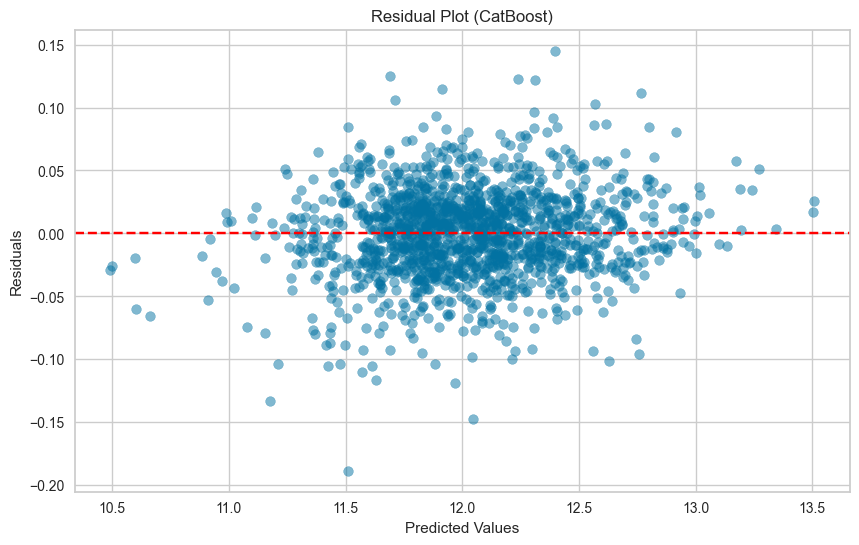

In [54]:
# Calculate residuals
residuals = y - prediction_train

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(prediction_train, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (CatBoost)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Make prediction for submission on the test set, don't have the target for the test set

In [55]:
catboost_model.predict(test_final)

array([11.73396285, 12.0054527 , 12.12336977, ..., 12.01524032,
       11.62980402, 12.31031708])

Make the prediction in level

In [56]:
predictions = np.exp(catboost_model.predict(test_final))

In [57]:
predictions

array([124737.00605276, 163644.66825787, 184124.92874484, ...,
       165254.22441171, 112398.2919612 , 221974.34271794])

Concatenate Id_test with predictions of CatBoost model

In [58]:
# Create a pandas Series with test Ids as index and predictions as values
submission = pd.concat([test['Id'], pd.Series(predictions, name='Predictions  ')], axis=1)

# Display the results Series
submission



Id  Predictions  
0     1461  124737.006053
1     1462  163644.668258
2     1463  184124.928745
3     1464  191654.707482
4     1465  174796.926552
...    ...            ...
1454  2915   80907.972419
1455  2916   80126.426820
1456  2917  165254.224412
1457  2918  112398.291961
1458  2919  221974.342718

[1459 rows x 2 columns]

## Gradient Boosting 

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

Implement a Gradient Boosting

In [60]:

from sklearn.model_selection import cross_val_score, KFold

# Initialize CatBoostRegressor
gradient_boosting = GradientBoostingRegressor()

# Define features (test_final) and target (log_target)
X = train_final
y = log_target

# Define KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(gradient_boosting, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert scores to RMSE (root mean squared error)
rmse_scores = np.sqrt(-cv_scores)

# Print average RMSE
print("Average RMSE in log:", np.mean(rmse_scores))

Average RMSE in log: 0.12398619093727994


In [61]:
print("Average RMSE in level for Gradient Boosting:", np.exp(np.mean(rmse_scores)))

Average RMSE in level for Gradient Boosting: 1.132000239028944


Plot the predicted and actual values in training set

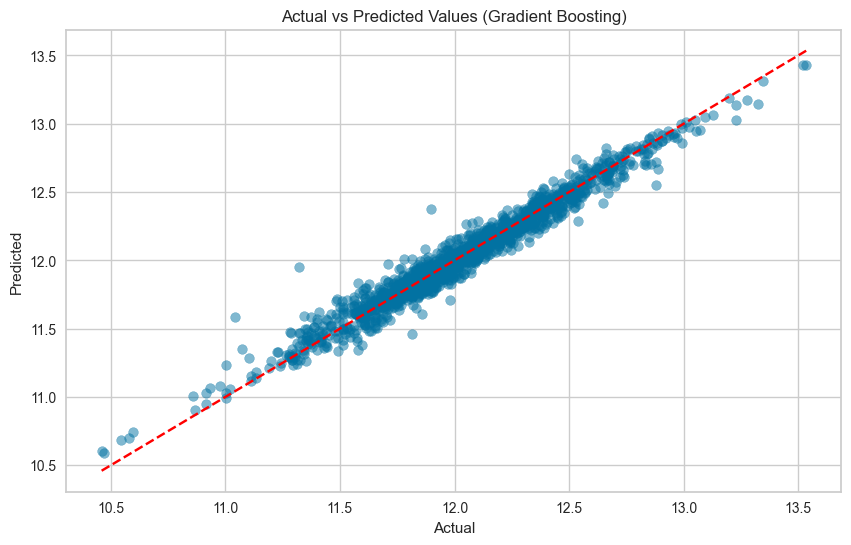

In [62]:
import matplotlib.pyplot as plt

# Fit the Gradient Boosting model
gradient_boosting.fit(X, y)

# Make predictions
predictions_for_submission_gradient= gradient_boosting.predict(test_final)
prediction_train_gradient = gradient_boosting.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, prediction_train_gradient, alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values (Gradient Boosting)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


Plot distribution of residuals 

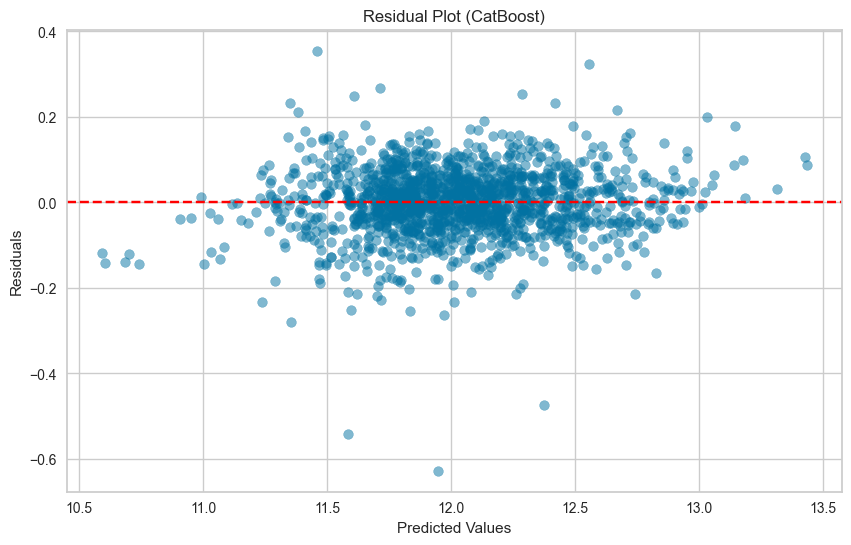

In [63]:
# Calculate residuals
residuals = y - prediction_train_gradient

# Plot residuals vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(prediction_train_gradient, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot (CatBoost)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


Get a sumbission series for Gradient boosting

In [64]:
predictions_gradient_boosting = np.exp(gradient_boosting.predict(test_final))

In [65]:
# Create a pandas Series with test Ids as index and predictions as values
submission = pd.concat([test['Id'], pd.Series(predictions_gradient_boosting, name='Predictions  ')], axis=1)

# Display the results Series
submission


Id  Predictions  
0     1461  127870.795738
1     1462  165645.081830
2     1463  178002.062356
3     1464  190179.549763
4     1465  194230.638909
...    ...            ...
1454  2915   86013.573753
1455  2916   84622.724370
1456  2917  164955.952990
1457  2918  112085.068211
1458  2919  229239.335291

[1459 rows x 2 columns]

# Hyper-parametrization Gradient Boosting

Model with checkpoint

In [66]:
import joblib
import os
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# Initialize GradientBoostingRegressor with default parameters
gbr = GradientBoostingRegressor(random_state=42)

# Define features (train_final) and target (log_target)
X = train_final
y = log_target

# Define KFold cross-validation with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Define a reduced parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Define checkpoint path
checkpoint_path = 'grid_search_checkpoint.pkl'

# Check if a checkpoint exists
if os.path.exists(checkpoint_path):
    # Load the checkpoint
    grid_search = joblib.load(checkpoint_path)
    print("Checkpoint loaded.")
else:
    # Set up GridSearchCV with the specified parameter grid
    grid_search = GridSearchCV(estimator=gbr,
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=kf,
                               verbose=1,
                               n_jobs=-1)

    # Perform grid search to find the best parameters
    grid_search.fit(X, y)
    
    # Save the checkpoint
    joblib.dump(grid_search, checkpoint_path)
    print("Checkpoint saved.")

# Retrieve the best parameters and corresponding score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE in log:", best_score)


Checkpoint loaded.
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE in log: 0.1237830389935286


In [67]:
RMSE = np.exp(best_score)
print("Best RMSE in level:", RMSE)

Best RMSE in level: 1.1317702943377048


Visualize the process

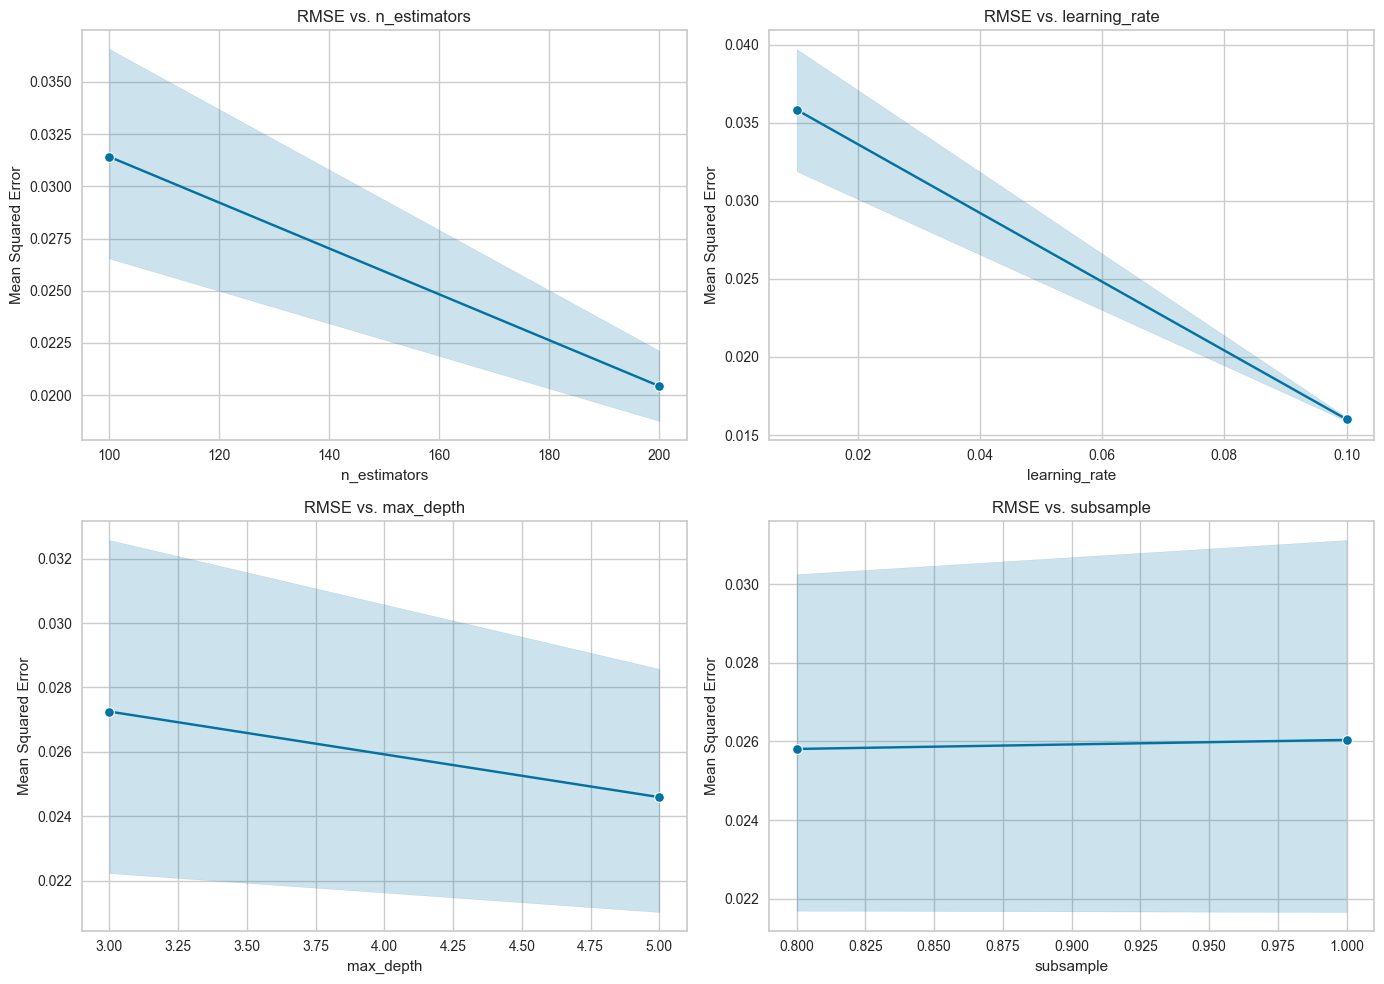

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert grid_search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Plot RMSE for different hyperparameters
plt.figure(figsize=(14, 10))

# Plotting RMSE vs. n_estimators
plt.subplot(2, 2, 1)
sns.lineplot(data=results, x='param_n_estimators', y=-results['mean_test_score'], marker='o')
plt.title('RMSE vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Mean Squared Error')

# Plotting RMSE vs. learning_rate
plt.subplot(2, 2, 2)
sns.lineplot(data=results, x='param_learning_rate', y=-results['mean_test_score'], marker='o')
plt.title('RMSE vs. learning_rate')
plt.xlabel('learning_rate')
plt.ylabel('Mean Squared Error')

# Plotting RMSE vs. max_depth
plt.subplot(2, 2, 3)
sns.lineplot(data=results, x='param_max_depth', y=-results['mean_test_score'], marker='o')
plt.title('RMSE vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')

# Plotting RMSE vs. subsample
plt.subplot(2, 2, 4)
sns.lineplot(data=results, x='param_subsample', y=-results['mean_test_score'], marker='o')
plt.title('RMSE vs. subsample')
plt.xlabel('subsample')
plt.ylabel('Mean Squared Error')

plt.tight_layout()
plt.show()


Visualization of Actual vs. Predicted Values

Min value: 34900.00000000001, Max value: 754999.9999999999


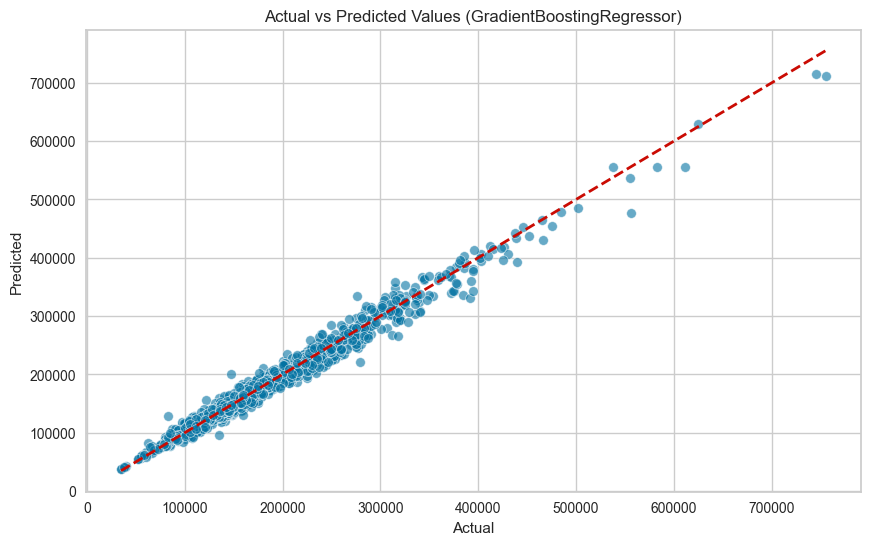

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


best_model = grid_search.best_estimator_
predictions = np.exp(best_model.predict(X))

# Calculate the range for the red line
actual_values = np.exp(y)
min_val = min(actual_values.min(), predictions.min())
max_val = max(actual_values.max(), predictions.max())

# Debugging: print min and max values
print(f"Min value: {min_val}, Max value: {max_val}")

# Plot Actual vs. Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=actual_values, y=predictions, alpha=0.6, color='b')
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (GradientBoostingRegressor)')
plt.show()


### Bagging the best models

In [ ]:
pip install scikit-learn catboost lightgbm


In [71]:
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

Implement the best model which miminize the most the RMSE in sample according to setup() function

In [72]:
models = {
    "CatBoost Regressor": CatBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Light Gradient Boosting Machine": LGBMRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Matching Pursuit": Ridge()
}

Implement all these models in a loop and print the average RMSE for each model. Add checkpoint

In [73]:
import pandas as pd
import numpy as np
import os
import joblib
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge, Ridge
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Define models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'BayesianRidge': BayesianRidge(),
    'Ridge': Ridge(),
    'LGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor()
}

# Define paths
predictions_path = 'Bagging_the_best_models.pkl'
rmse_path = 'Bagging_the_best_models_RMSE.pkl'

# Initialize DataFrames
if os.path.exists(predictions_path):
    predictions_df = joblib.load(predictions_path)
else:
    predictions_df = pd.DataFrame()

if os.path.exists(rmse_path):
    RMSE = joblib.load(rmse_path)
else:
    RMSE = pd.DataFrame()

# Iterate through each model and make predictions
for name, model in models.items():
    # Check if the model's predictions are already computed
    if name in predictions_df.columns and name in RMSE.columns:
        print(f"Checkpoint loaded for {name}")
        continue
    
    # Define KFold cross-validation with 10 folds
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

    # Convert scores to RMSE (root mean squared error)
    rmse_scores = np.sqrt(-cv_scores)

    # Store RMSE scores for each fold in the DataFrame
    RMSE[name] = np.exp(rmse_scores)

    # Fit the model on the entire training data
    model.fit(X, y)
    
    # Make predictions on the test data
    predictions = model.predict(test_final)
    
    # If predictions need to be transformed (e.g., using exponential)
    predictions = np.exp(predictions)  # Adjust this line based on your specific needs
    
    # Add predictions to the DataFrame
    predictions_df[name] = predictions

    # Save checkpoints
    joblib.dump(predictions_df, predictions_path)
    joblib.dump(RMSE, rmse_path)
    print(f"Checkpoint saved for {name}")

# Calculate the mean of the predictions from all models
predictions_df['Mean'] = predictions_df.mean(axis=1)

# Add Id column
predictions_df['Id'] = test['Id']

# Calculate the average RMSE for each fold across all models and add it to the RMSE DataFrame
RMSE['Average RMSE per Fold'] = RMSE.mean(axis=1)

# Save final predictions and RMSE
predictions_df.to_csv('final_predictions.csv', index=False)
RMSE.to_csv('final_rmse.csv', index=False)


Checkpoint loaded for RandomForest
Checkpoint loaded for GradientBoosting
Checkpoint loaded for ExtraTrees
Checkpoint loaded for BayesianRidge
Checkpoint loaded for Ridge
Checkpoint loaded for LGBM
Checkpoint loaded for CatBoost


Predictions in-sample

In [74]:
predictions_df

RandomForest  GradientBoosting     ExtraTrees  BayesianRidge  \
0     131274.927317     127870.795738  119099.167185  116205.354500   
1     160943.128544     165645.081830  152620.595482  156597.791477   
2     178152.266194     178002.062356  172097.335365  184227.256467   
3     184209.449974     190179.549763  188447.275325  196277.069679   
4     192472.270699     194230.638909  190720.635319  197736.699305   
...             ...               ...            ...            ...   
1454   89014.659896      86013.573753   86725.980751   87010.772730   
1455   87366.740093      84622.724370   85276.331157   80960.553974   
1456  161067.084678     164955.952990  162424.266049  171391.876235   
1457  107095.913072     112085.068211  112804.283085  116313.247470   
1458  222924.885584     229239.335291  214729.306627  221821.147075   

              Ridge           LGBM       CatBoost           Mean    Id  
0     119445.114007  126035.019185  124737.006053  123523.911998  1461  
1     153889.077591  165238.496299  163644.668258  159796.977069  1462  
2     186843.354701  174140.642452  184124.928745  179655.406611  1463  
3     197776.386434  188899.723595  191654.707482  191063.451750  1464  
4     200312.107890  187844.820470  174796.926552  191159.157021  1465  
...             ...            ...            ...            ...   ...  
1454   84550.984576   82485.013343   80907.972419   85244.136781  2915  
1455   79669.130347   80012.481405   80126.426820   82576.341166  2916  
1456  172430.538255  165388.819374  165254.224412  166130.394570  2917  
1457  116928.555292  111318.827999  112398.291961  112706.312442  2918  
1458  218476.694049  223068.603896  221974.342718  221747.759320  2919  

[1459 rows x 9 columns]

In [75]:
import pandas as pd



# Selecting only the last two columns ('Id' and 'Mean')
id_mean_df = predictions_df[['Id', 'Mean']]

# Renaming the 'Mean' column to 'SalePrice'
id_mean_df.rename(columns={'Mean': 'SalePrice'}, inplace=True)

# Saving the 'Id' and 'SalePrice' columns to a new CSV file
id_mean_df.to_csv('submission_NEW.csv', index=False)



In sample RMSE

In [76]:
RMSE

RandomForest  GradientBoosting  ExtraTrees  BayesianRidge     Ridge  \
0      1.137863          1.130215    1.125217       1.110549  1.113421   
1      1.168700          1.155236    1.148139       1.157888  1.160053   
2      1.107382          1.108370    1.119272       1.113216  1.121060   
3      1.154797          1.131429    1.150738       1.133319  1.134931   
4      1.185515          1.154437    1.171325       1.154602  1.156106   
5      1.171430          1.146798    1.144121       1.198736  1.216943   
6      1.173664          1.141548    1.154605       1.134565  1.137722   
7      1.127870          1.114700    1.132951       1.109564  1.115062   
8      1.150449          1.152320    1.134511       1.137243  1.143679   
9      1.101916          1.089822    1.102180       1.086543  1.086138   

       LGBM  CatBoost  Average RMSE per Fold  
0  1.135365  1.118388               1.124431  
1  1.156211  1.142432               1.155523  
2  1.119729  1.100761               1.112827  
3  1.134352  1.122382               1.137421  
4  1.168780  1.144889               1.162236  
5  1.177241  1.157388               1.173237  
6  1.157641  1.141488               1.148748  
7  1.114537  1.107521               1.117458  
8  1.143086  1.131859               1.141878  
9  1.091301  1.079815               1.091102

model with checkpoint

Checkpoint loaded.
Checkpoint found for CatBoost Regressor. Skipping...
Checkpoint found for Gradient Boosting Regressor. Skipping...
Checkpoint found for Light Gradient Boosting Machine. Skipping...
Checkpoint found for Bayesian Ridge. Skipping...
Checkpoint found for Extra Trees Regressor. Skipping...
Checkpoint found for Random Forest Regressor. Skipping...
Checkpoint found for Matching Pursuit. Skipping...


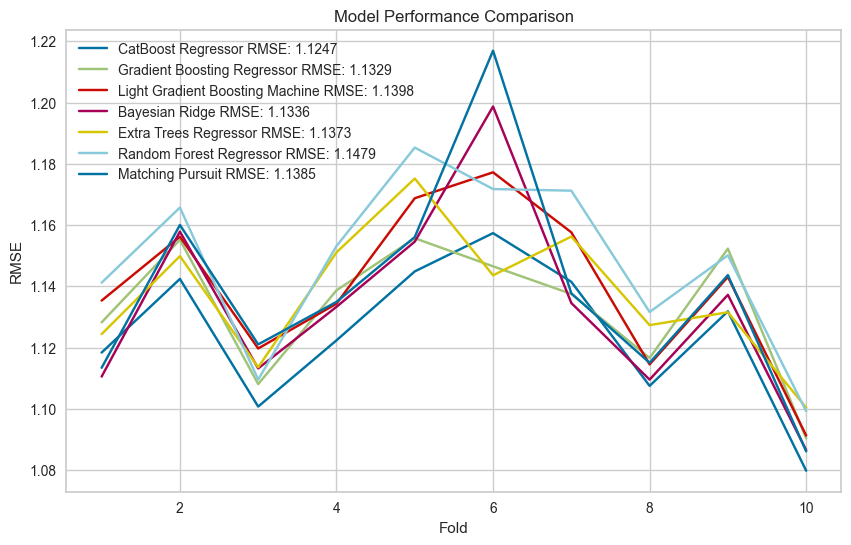

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import joblib
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Initialize models
models = {
    "CatBoost Regressor": CatBoostRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Light Gradient Boosting Machine": LGBMRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Matching Pursuit": Ridge()
}

# Define checkpoint path
checkpoint_path = 'Bagging_the_best_models_results_checkpoint.pkl'

# Initialize dictionary to store results
if os.path.exists(checkpoint_path):
    results = joblib.load(checkpoint_path)
    print("Checkpoint loaded.")
else:
    results = {}

# Perform 10-fold cross-validation for each model
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    if name in results:
        print(f"Checkpoint found for {name}. Skipping...")
        continue
    print(f"Training {name}...")
    # Calculate RMSE using cross-validation
    scores = np.exp(np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')))
    results[name] = scores
    rmse_mean = np.mean(scores)
    print(f"{name} RMSE: {rmse_mean}")
    # Save checkpoint
    joblib.dump(results, checkpoint_path)
    print("Checkpoint saved.")

# Plotting
plt.figure(figsize=(10, 6))
for name, scores in results.items():
    plt.plot(range(1, 11), scores, label=f"{name} RMSE: {np.mean(scores):.4f}")

plt.title('Model Performance Comparison')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

plt.show()


Get the RMSE across the 10 different fold for each ML model implemented

In [78]:
results

{'CatBoost Regressor': array([1.11838828, 1.14243153, 1.10076146, 1.12238218, 1.14488877,
        1.15738751, 1.14148806, 1.10752132, 1.13185909, 1.07981505]),
 'Gradient Boosting Regressor': array([1.1282595 , 1.15520408, 1.10810239, 1.13869457, 1.1557211 ,
        1.14655017, 1.13753148, 1.11660858, 1.15232843, 1.0903798 ]),
 'Light Gradient Boosting Machine': array([1.13536499, 1.1562115 , 1.11972932, 1.13435167, 1.16877979,
        1.17724089, 1.15764122, 1.11453685, 1.143086  , 1.09130087]),
 'Bayesian Ridge': array([1.11054897, 1.15788832, 1.11321587, 1.13331937, 1.15460187,
        1.19873581, 1.13456461, 1.10956386, 1.13724306, 1.0865434 ]),
 'Extra Trees Regressor': array([1.12442585, 1.14988152, 1.11359262, 1.1511078 , 1.17521574,
        1.14361316, 1.15626516, 1.12734804, 1.13155277, 1.10042193]),
 'Random Forest Regressor': array([1.14120835, 1.16573608, 1.1095646 , 1.15316339, 1.18531684,
        1.17178871, 1.17124639, 1.13163433, 1.15014911, 1.09926025]),
 'Matching Pur

Get the RMSE for each model and the variacne 

In [79]:
for name, result in results.items():
    print(name + " RMSE: " + str(np.mean(result)))
    print(name + " variance: " + str(np.std(result)))

CatBoost Regressor RMSE: 1.1246923251204959
CatBoost Regressor variance: 0.022475736258084873
Gradient Boosting Regressor RMSE: 1.1329380111788738
Gradient Boosting Regressor variance: 0.020849249139085674
Light Gradient Boosting Machine RMSE: 1.1398243095473217
Light Gradient Boosting Machine variance: 0.025065245318024884
Bayesian Ridge RMSE: 1.133622512973687
Bayesian Ridge variance: 0.030044754321117154
Extra Trees Regressor RMSE: 1.1373424596923178
Extra Trees Regressor variance: 0.020990274373786453
Random Forest Regressor RMSE: 1.1479068039239524
Random Forest Regressor variance: 0.026479067054127964
Matching Pursuit RMSE: 1.1385114346438887
Matching Pursuit variance: 0.0334547199840595


### Feature Importance

Feature importance Tree-based Models (CatBoost, Gradient Boosting, LightGBM, Extra Trees, Random Forest)


In [ ]:
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from lightgbm import LGBMRegressor
import pandas as pd

models = {
    "CatBoost Regressor": CatBoostRegressor(silent=True),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "Light Gradient Boosting Machine": LGBMRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}


feature_importances = pd.DataFrame(index=X.columns)

for name, model in models.items():
    model.fit(X, y)
    # Retrieve and store feature importances from the model
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        # Normalize importances to sum to 1 for comparability
        feature_importances[name] = importances / importances.sum()
    else:
        feature_importances[name] = [None] * len(X.columns)

# Calculate the average of normalized importances across all models
feature_importances['Average'] = feature_importances.mean(axis=1)

# Add a descriptive layer to columns
feature_importances.columns = pd.MultiIndex.from_tuples([(col, 'Feature Importance') for col in feature_importances.columns])

# Sort the DataFrame by the average importance
feature_importances = feature_importances.sort_values(by=('Average', 'Feature Importance'), ascending=False)

feature_importances




In [81]:
feature_importances

CatBoost Regressor Gradient Boosting Regressor  \
                    Feature Importance          Feature Importance   
OverallQual                   0.193109                    0.349280   
totalarea                     0.163533                    0.284898   
totalsf                       0.085449                    0.091321   
ExterQual_TA                  0.001918                    0.001818   
YearBuilt                     0.034135                    0.032226   
...                                ...                         ...   
Exterior1st_ImStucc           0.000000                    0.000000   
RoofMatl_Membran              0.000000                    0.000000   
MiscFeature_TenC              0.000000                    0.000000   
HeatingQC_Po                  0.000000                    0.000000   
MSSubClass_150                0.000000                    0.000000   

                    Light Gradient Boosting Machine Extra Trees Regressor  \
                                 Feature Importance    Feature Importance   
OverallQual                                0.023667          2.211687e-01   
totalarea                                  0.051333          1.408491e-01   
totalsf                                    0.050000          7.189377e-02   
ExterQual_TA                               0.001000          1.608436e-01   
YearBuilt                                  0.033333          3.933913e-02   
...                                             ...                   ...   
Exterior1st_ImStucc                        0.000000          3.203853e-07   
RoofMatl_Membran                           0.000000          2.902489e-07   
MiscFeature_TenC                           0.000000          7.904622e-08   
HeatingQC_Po                               0.000000          7.524297e-08   
MSSubClass_150                             0.000000          0.000000e+00   

                    Random Forest Regressor            Average  
                         Feature Importance Feature Importance  
OverallQual                    4.651073e-01       2.504663e-01  
totalarea                      2.219507e-01       1.725128e-01  
totalsf                        1.031130e-01       8.035534e-02  
ExterQual_TA                   3.450875e-04       3.318506e-02  
YearBuilt                      1.012168e-02       2.983097e-02  
...                                     ...                ...  
Exterior1st_ImStucc            0.000000e+00       6.407705e-08  
RoofMatl_Membran               9.483626e-11       5.806874e-08  
MiscFeature_TenC               2.914573e-08       2.163839e-08  
HeatingQC_Po                   0.000000e+00       1.504859e-08  
MSSubClass_150                 0.000000e+00       0.000000e+00  

[323 rows x 6 columns]

Obtain a table that resume the feature importance across all the tree based models

In [82]:
# Create a new DataFrame for visualization
sorted_features = feature_importances.index.to_frame(index=False)
sorted_features['Importance'] = feature_importances[('Average', 'Feature Importance')].values
sorted_features.columns = ['Feature', 'Importance']

# Set Feature as the index
sorted_features.set_index('Feature', inplace=True)

# Visualize feature importances using the bar style in Jupyter Notebook
styled_feature_importance_df = sorted_features.style.bar(subset=['Importance'], color='lightblue')

# Display the styled DataFrame
styled_feature_importance_df

### Neural network 


First basic neural network implemented with checkpoints. 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt, exp
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import os

# Define the neural network model
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Function to train and save model
def train_and_save_model(model, X, y, checkpoint_path, epochs=1000):
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_path,
        save_weights_only=True,
        save_best_only=True,
        monitor='loss',
        mode='min',
        verbose=1
    )
    model.fit(X, y, epochs=epochs, verbose=0, callbacks=[checkpoint_callback])
    print("Training completed and checkpoint saved.")

# Create model
input_dim = X.shape[1]
model = create_model(input_dim)

# Define checkpoint path
checkpoint_path = "first_NN_checkpoint.weights.h5"

# Check if the checkpoint file exists
if os.path.exists(checkpoint_path):
    try:
        print("Checkpoint exists. Loading model weights.")
        model.load_weights(checkpoint_path)
        # Validate the loaded weights by making a prediction
        y_train_pred = model.predict(X)
        rmse = sqrt(mean_squared_error(y, y_train_pred))
        exp_rmse_NN_1 = exp(rmse)
        print(f'Exponential RMSE: {exp_rmse_NN_1}')
        if np.isnan(exp_rmse_NN_1) or exp_rmse_NN_1 == float('inf'):
            raise ValueError("Loaded weights are invalid.")
    except (ValueError, tf.errors.OpError) as e:
        print(f"Error loading checkpoint weights or invalid weights: {e}")
        print("Deleting corrupted checkpoint and training from scratch.")
        os.remove(checkpoint_path)
        # Recreate the model to reset weights
        model = create_model(input_dim)
        # Train the model on the training dataset with checkpointing
        train_and_save_model(model, X, y, checkpoint_path)
else:
    # Train the model on the training dataset with checkpointing
    train_and_save_model(model, X, y, checkpoint_path)

# Make predictions on the training data
y_train_pred = model.predict(X)

# Calculate RMSE on training data and compute the exponential of the RMSE
rmse = sqrt(mean_squared_error(y, y_train_pred))
exp_rmse_NN_1 = exp(rmse)
print(f'Exponential RMSE: {exp_rmse_NN_1}')






In [84]:
print(f'Exponential RMSE: {exp_rmse_NN_1}')

Exponential RMSE: 1.0525366293748772


In [85]:
# Make predictions on the test_final dataset
y_test_final_pred = model.predict(test_final)
submissions = pd.concat([test['Id'], pd.Series(np.exp(y_test_final_pred.flatten()), name='SalePrice' )], axis=1)
print('Predictions on test_final:', np.exp(y_test_final_pred))

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step
Predictions on test_final: [[124981.01]
 [163689.22]
 [228386.73]
 ...
 [190442.47]
 [102627.8 ]
 [221784.31]]


In [86]:
print('Predictions on test_final:', np.exp(y_test_final_pred))

Predictions on test_final: [[124981.01]
 [163689.22]
 [228386.73]
 ...
 [190442.47]
 [102627.8 ]
 [221784.31]]


Visualize the process

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, exp

# Generate subplots for the first two visualizations only
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Function to calculate RMSE and its exponential
def calculate_exp_rmse(y_true, y_pred):
    rmse = sqrt(np.mean((y_true - y_pred) ** 2))
    return exp(rmse)

# Training history and manual RMSE calculation over epochs
num_epochs = 100
rmse_list = []

# Train model and store RMSE values
for epoch in range(num_epochs):
    history = model.fit(X, y, epochs=1, verbose=0)
    y_train_pred = model.predict(X).flatten()
    exp_rmse = calculate_exp_rmse(y, y_train_pred)
    rmse_list.append(exp_rmse)

# Plot 1: Exponentiated RMSE over epochs
axs[0].plot(rmse_list)
axs[0].set_title('Training Exponentiated RMSE Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Exponentiated RMSE')

# Plot 2: Training Predictions vs Actual
y_train_pred = model.predict(X).flatten()
axs[1].scatter(y, y_train_pred)
axs[1].plot([min(y), max(y)], [min(y), max(y)], color='red')  # Diagonal line
axs[1].set_title('Training Predictions vs. Actual')
axs[1].set_xlabel('Actual Values')
axs


In [88]:
# Plot 1: Exponentiated RMSE over epochs
axs[0].plot(rmse_list)
axs[0].set_title('Training Exponentiated RMSE Over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Exponentiated RMSE')

# Plot 2: Training Predictions vs Actual
y_train_pred = model.predict(X).flatten()
axs[1].scatter(y, y_train_pred)
axs[1].plot([min(y), max(y)], [min(y), max(y)], color='red')  # Diagonal line
axs[1].set_title('Training Predictions vs. Actual')
axs[1].set_xlabel('Actual Values')
axs


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


array([<Axes: title={'center': 'Training Exponentiated RMSE Over Epochs'}, xlabel='Epochs', ylabel='Exponentiated RMSE'>,
       <Axes: title={'center': 'Training Predictions vs. Actual'}, xlabel='Actual Values'>],
      dtype=object)

Get a description of the first NN implemented

In [89]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,549 (267.77 KB)

 Trainable params: 22,849 (89.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,700 (178.52 KB)

In [ ]:
pip install netron


Save the model

In [ ]:
# Save the model in .h5 format
model.save("my_model.h5")


Out-sample predictions with first neural network

In [92]:
submissions

Id      SalePrice
0     1461  124981.007812
1     1462  163689.218750
2     1463  228386.734375
3     1464  218505.437500
4     1465  175223.437500
...    ...            ...
1454  2915   83526.890625
1455  2916   75983.882812
1456  2917  190442.468750
1457  2918  102627.796875
1458  2919  221784.312500

[1459 rows x 2 columns]

In [93]:
# Save the DataFrame to a CSV file
submissions.to_csv('submission_NN.csv', index=False)

Get the in-sample RMSE of the first neural network

In [94]:
exp_rmse_NN_1

1.0525366293748772

Hyperparameter optimization (second Neural network)

In [ ]:
pip install keras-tuner


Hyperparameter optimization (second Neural network). Model with checkpoints

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt, exp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras_tuner import HyperModel, RandomSearch
import tensorflow as tf
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Ensure your data is preprocessed (standardized)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_final_scaled = scaler.transform(test_final)

# Define the first neural network architecture and its training
class RegressionHyperModel(HyperModel):
    def __init__(self, input_dim):
        self.input_dim = input_dim

    def build(self, hp):
        model = Sequential()
        model.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=128, step=16),
            activation='relu',
            input_dim=self.input_dim
        ))
        model.add(Dense(
            units=hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation='relu'
        ))
        model.add(Dense(1))
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss='mse'
        )
        return model

# Initialize the HyperModel with the input dimension
hypermodel_1 = RegressionHyperModel(input_dim=X_scaled.shape[1])

# Ensure directory for checkpoints exists
checkpoint_dir = '.'
checkpoint_path_1 = os.path.join(checkpoint_dir, "first_NN_checkpoint.weights.h5")

# Define a checkpoint callback
checkpoint_callback_1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_1,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Perform Random Search to find optimal hyperparameters
tuner_1 = RandomSearch(
    hypermodel_1,
    objective='val_loss',
    max_trials=10,  # Adjusted to 10 trials
    executions_per_trial=2,
    directory='hyperopt_dir',
    project_name='regression_tuning_1'
)

# Start the hyperparameter tuning process with checkpointing
tuner_1.search(X_scaled, y, epochs=1000, validation_split=0.2, callbacks=[checkpoint_callback_1])

# Retrieve the best model
best_model_1 = tuner_1.get_best_models(num_models=1)[0]

# Explicitly save weights to ensure the checkpoint file is created
best_model_1.save_weights(checkpoint_path_1)
print("First NN Checkpoint saved explicitly.")

# Load the best weights if they exist
if os.path.exists(checkpoint_path_1):
    best_model_1.load_weights(checkpoint_path_1)
    print("First NN Checkpoint loaded.")

# Make predictions on the training data with the best model
y_train_pred_1 = best_model_1.predict(X_scaled)
rmse_1 = sqrt(mean_squared_error(y, y_train_pred_1))
exp_rmse_NN_1 = exp(rmse_1)
print(f'Exponential RMSE (First Optimized Model): {exp_rmse_NN_1}')

# Make predictions on the test_final dataset
y_test_final_pred_1 = best_model_1.predict(test_final_scaled)
submission_1 = pd.concat([test['Id'], pd.Series(np.exp(y_test_final_pred_1.flatten()), name='SalePrice first NN')], axis=1)
print('Predictions on test_final (First Optimized Model):', np.exp(y_test_final_pred_1))

# Define the second neural network architecture and its training
class RegressionHyperModelSecond(HyperModel):
    def __init__(self, input_dim):
        self.input_dim = input_dim

    def build(self, hp):
        model = Sequential()
        model.add(Dense(
            units=hp.Int('units_1', min_value=32, max_value=128, step=16),
            activation='relu',
            input_dim=self.input_dim
        ))
        model.add(Dense(
            units=hp.Int('units_2', min_value=16, max_value=64, step=16),
            activation='relu'
        ))
        model.add(Dense(1))
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss='mse'
        )
        return model

# Initialize the second HyperModel with the input dimension
hypermodel_2 = RegressionHyperModelSecond(input_dim=X_scaled.shape[1])

# Ensure directory for checkpoints exists
checkpoint_path_2 = os.path.join(checkpoint_dir, "second_NN_checkpoint.weights.h5")

# Define a checkpoint callback
checkpoint_callback_2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_2,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)

# Perform Random Search to find optimal hyperparameters
tuner_2 = RandomSearch(
    hypermodel_2,
    objective='val_loss',
    max_trials=10,  # Set to 10 trials as per the specifications
    executions_per_trial=2,
    directory='hyperopt_dir',
    project_name='regression_tuning_2'
)

# Start the hyperparameter tuning process with checkpointing
tuner_2.search(X_scaled, y, epochs=1000, validation_split=0.2, callbacks=[checkpoint_callback_2])

# Retrieve the best model
best_model_2 = tuner_2.get_best_models(num_models=1)[0]

# Explicitly save weights to ensure the checkpoint file is created
best_model_2.save_weights(checkpoint_path_2)
print("Second NN Checkpoint saved explicitly.")

# Load the best weights if they exist
if os.path.exists(checkpoint_path_2):
    best_model_2.load_weights(checkpoint_path_2)
    print("Second NN Checkpoint loaded.")

# Make predictions on the training data with the best model
y_train_pred_2 = best_model_2.predict(X_scaled)
rmse_2 = sqrt(mean_squared_error(y, y_train_pred_2))
exp_rmse_NN_2 = exp(rmse_2)
print(f'Exponential RMSE (Second Optimized Model): {exp_rmse_NN_2}')

# Make predictions on the test_final dataset
y_test_final_pred_2 = best_model_2.predict(test_final_scaled)
submission_2 = pd.concat([test['Id'], pd.Series(np.exp(y_test_final_pred_2.flatten()), name='SalePrice second NN')], axis=1)
print('Predictions on test_final (Second Optimized Model):', np.exp(y_test_final_pred_2))

# Verify the directory contents
print(f"Contents of current directory: {os.listdir(checkpoint_dir)}")





In [97]:
print(f'Exponential RMSE (Optimized Model): {exp_rmse_NN_2}')
print('Predictions on test_final (Optimized Model):', np.exp(y_test_final_pred))


Exponential RMSE (Optimized Model): 1.5272766307667518
Predictions on test_final (Optimized Model): [[124981.01]
 [163689.22]
 [228386.73]
 ...
 [190442.47]
 [102627.8 ]
 [221784.31]]


In [98]:
exp_rmse_NN_2

1.5272766307667518

Prediction out of sample second neural network

In [99]:
submission_2

Id  SalePrice second NN
0     1461        119474.687500
1     1462        193938.390625
2     1463        116484.890625
3     1464         82795.039062
4     1465        177388.531250
...    ...                  ...
1454  2915         60082.234375
1455  2916        162235.343750
1456  2917        176300.390625
1457  2918        151321.234375
1458  2919        219361.265625

[1459 rows x 2 columns]

In [ ]:
best_model_2.save("my_model.h5")


Enhance parameter optimization (third neural network)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt, exp
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras_tuner import HyperModel, RandomSearch
import tensorflow as tf
import os
import pandas as pd



# Custom HyperModel to define the architecture
class DeeperRegressionHyperModel(HyperModel):
    def __init__(self, input_dim):
        self.input_dim = input_dim

    def build(self, hp):
        model = Sequential()
        model.add(Dense(
            units=hp.Int('units_1', min_value=64, max_value=256, step=32),
            activation='relu',
            input_dim=self.input_dim
        ))
        model.add(Dense(
            units=hp.Int('units_2', min_value=32, max_value=128, step=16),
            activation='relu'
        ))
        model.add(Dense(
            units=hp.Int('units_3', min_value=16, max_value=64, step=16),
            activation='relu'
        ))
        model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.4, step=0.1)))
        model.add(Dense(1))
        model.compile(
            optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
            loss='mse'
        )
        return model

# Initialize the HyperModel with the input dimension
hypermodel = DeeperRegressionHyperModel(input_dim=X.shape[1])

# Ensure directory for checkpoints exists
checkpoint_dir = '.'
checkpoint_path = os.path.join(checkpoint_dir, "third_NN_checkpoint.weights.h5")
hyperparameters_path = os.path.join(checkpoint_dir, "best_hyperparameters.npy")

# Define a checkpoint callback
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1
)


from keras_tuner import HyperParameters

# Check if the checkpoint file exists
if os.path.exists(checkpoint_path) and os.path.exists(hyperparameters_path):
    print("Checkpoint exists. Loading model weights and hyperparameters.")
    # Load best hyperparameters
    best_hps_values = np.load(hyperparameters_path, allow_pickle=True).item()
    best_hps = HyperParameters()
    best_hps.values = best_hps_values
    best_model = hypermodel.build(best_hps)
    best_model.load_weights(checkpoint_path)
else:
    # Perform Random Search to find optimal hyperparameters
    tuner = RandomSearch(
        hypermodel,
        objective='val_loss',
        max_trials=3,
        executions_per_trial=3,
        directory='deep_hyperopt_dir',
        project_name='deep_regression_tuning'
    )
    # Start the hyperparameter tuning process
    tuner.search(X, y, epochs=3000, validation_split=0.2, callbacks=[checkpoint_callback])
    # Retrieve the best model
    best_model = tuner.get_best_models(num_models=1)[0]
    # Save the best hyperparameters
    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
    np.save(hyperparameters_path, best_hps.values)
    # Explicitly save weights to ensure the checkpoint file is created
    best_model.save_weights(checkpoint_path)
    print("Checkpoint saved explicitly.")

# Make predictions on the training data with the best model
y_train_pred = best_model.predict(X)
rmse = sqrt(mean_squared_error(y, y_train_pred))
exp_rmse_NN_3 = exp(rmse)
print(f'Exponential RMSE (Optimized Deep Model): {exp_rmse_NN_3}')

# Make predictions on the test_final dataset
y_test_final_pred = best_model.predict(test_final)
submission_3 = pd.concat([test['Id'], pd.Series(np.exp(y_test_final_pred.flatten()), name='SalePrice third NN')], axis=1)
print('Predictions on test_final (Optimized Model):', np.exp(y_test_final_pred))

# Verify the directory contents
print(f"Contents of current directory: {os.listdir(checkpoint_dir)}")




In [102]:
print(f'Exponential RMSE (Optimized Deep Model): {exp_rmse_NN_3}')
print('Predictions on test_final (Optimized Model):', np.exp(y_test_final_pred))
print(f"Contents of current directory: {os.listdir(checkpoint_dir)}")

Exponential RMSE (Optimized Deep Model): 1.068596867183995
Predictions on test_final (Optimized Model): [[132290.31 ]
 [163794.47 ]
 [187142.12 ]
 ...
 [186638.1  ]
 [125469.695]
 [221700.16 ]]
Contents of current directory: ['first_NN_checkpoint.weights.h5', 'final_predictions.csv', '.DS_Store', 'best_hyperparameters.npy', 'deep_hyperopt_dir', 'Bagging_the_best_models_results_checkpoint.pkl', 'Bagging_the_best_models.pkl', 'Bagging_the_best_models_RMSE.pkl', 'submission_NEW.csv', 'hyperopt_dir', 'logs.log', 'README.md', 'grid_search_checkpoint.pkl', 'third_NN_checkpoint.weights.h5', 'my_model.h5', 'ADA_Spring2024_Riccardo_Croci_final.ipynb', 'final_rmse.csv', '.git', 'second_NN_checkpoint.weights.h5', 'submission_NN.csv', 'catboost_info', 'final_catboost_model.cbm']


Out of sample predictions third neural network

In [103]:
submission_3

Id  SalePrice third NN
0     1461       132290.312500
1     1462       163794.468750
2     1463       187142.125000
3     1464       192652.437500
4     1465       185382.859375
...    ...                 ...
1454  2915        89847.796875
1455  2916        77021.187500
1456  2917       186638.093750
1457  2918       125469.695312
1458  2919       221700.156250

[1459 rows x 2 columns]

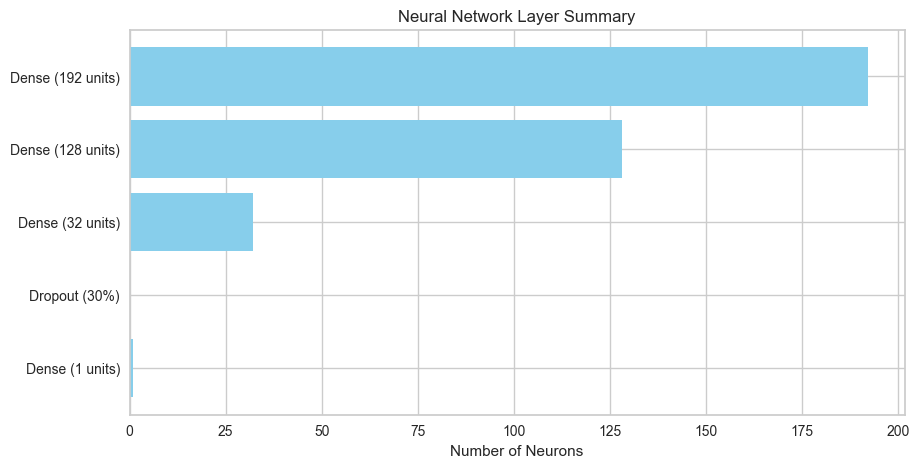

In [104]:

import matplotlib.pyplot as plt

def plot_neural_network_summary(model):
    layer_sizes = []
    layer_labels = []

    # Extract relevant information about each layer
    for layer in model.layers:
        if hasattr(layer, 'units'):
            layer_sizes.append(layer.units)
            layer_labels.append(f"{layer.__class__.__name__} ({layer.units} units)")
        elif hasattr(layer, 'rate'):
            # For dropout layers, append a descriptive label
            layer_sizes.append(0)
            layer_labels.append(f"Dropout ({int(layer.rate * 100)}%)")
        else:
            layer_sizes.append(0)
            layer_labels.append(layer.__class__.__name__)

    # Plot the summary as a bar graph
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.barh(range(len(layer_sizes)), layer_sizes, color='skyblue')
    ax.set_yticks(range(len(layer_sizes)))
    ax.set_yticklabels(layer_labels)
    ax.set_xlabel('Number of Neurons')
    ax.set_title('Neural Network Layer Summary')
    plt.gca().invert_yaxis()
    plt.show()

# Use this function to plot the best model
plot_neural_network_summary(best_model)


In [105]:
RMSE_NN = pd.concat([pd.Series([exp_rmse_NN_1, exp_rmse_NN_2, exp_rmse_NN_3], name='Exponential RMSE', index=['First NN', 'Second NN', 'Third NN']),
                     ], axis=1)

In [106]:
RMSE_NN

Exponential RMSE
First NN           1.749608
Second NN          1.527277
Third NN           1.068597

In [107]:
import pandas as pd



# Step 1: Rename the prediction columns to the desired names
submissions.rename(columns={'PSalePrice first NN': 'SalePrice predictions first NN'}, inplace=True)  # Adjusted to reflect correct original column name
submission_2.rename(columns={'SalePrice second NN': 'SalePrice predictions second NN'}, inplace=True)
submission_3.rename(columns={'SalePrice third NN': 'SalePrice predictions third NN'}, inplace=True)

# Step 2: Merge these DataFrames on the 'Id' column
# Merge 'submission' and 'submission_2' first
submission_NN = pd.merge(submission, submission_2, on='Id')
# Then merge the result with 'submission_3'
submission_NN = pd.merge(submission_NN, submission_3, on='Id')

submission_NN





Id  Predictions    SalePrice predictions second NN  \
0     1461  127870.795738                    119474.687500   
1     1462  165645.081830                    193938.390625   
2     1463  178002.062356                    116484.890625   
3     1464  190179.549763                     82795.039062   
4     1465  194230.638909                    177388.531250   
...    ...            ...                              ...   
1454  2915   86013.573753                     60082.234375   
1455  2916   84622.724370                    162235.343750   
1456  2917  164955.952990                    176300.390625   
1457  2918  112085.068211                    151321.234375   
1458  2919  229239.335291                    219361.265625   

      SalePrice predictions third NN  
0                      132290.312500  
1                      163794.468750  
2                      187142.125000  
3                      192652.437500  
4                      185382.859375  
...                              ...  
1454                    89847.796875  
1455                    77021.187500  
1456                   186638.093750  
1457                   125469.695312  
1458                   221700.156250  

[1459 rows x 4 columns]